In [1]:
from re import sub
from decimal import Decimal
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from scipy import stats

from sklearn.metrics import confusion_matrix

from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
import math

In [2]:
import os
for dirname, _, filenames in os.walk('/home/sukrit/Desktop/data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# basic operations
import numpy as np
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# read data
data = pd.read_csv('/home/sukrit/Desktop/data.csv')


In [5]:
data1 = pd.read_csv('/home/sukrit/Desktop/data.csv')

In [6]:
data.head(5)

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club      ...       Composure Marking StandingTackle  \
0         FC Barcelona      ...            96.0    33.0           28.0   
1             Juventus      ...            95.0    28.0           31.0   
2  Paris Saint-Germain      ...            94.0    27.0           24.0   
3    Manchester United      ...            68.0    15.0           21.0   
4      Manchester City      ...            88.0    68.0           58.0   

   SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes  \
0           26.0      6.0        11.0       15.0           14.0        8.0   
1           23.0      7.0        11.0       15.0           14.0       11.0   
2           33.0      9.0         9.0       15.0           15.0       11.0   
3           13.0     90.0        85.0       87.0           88.0       94.0   
4           51.0     15.0        13.0        5.0           10.0       13.0   

  Release Clause  
0        €226.5M  
1        €127.1M  
2        €228.1M  
3        €138.6M  
4        €196.4M  

[5 rows x 89 columns]

In [7]:
pd.set_option('display.max_columns', 89)

In [8]:
data.describe()

Unnamed: 0             ID           Age       Overall     Potential  \
count  18207.000000   18207.000000  18207.000000  18207.000000  18207.000000   
mean    9103.000000  214298.338606     25.122206     66.238699     71.307299   
std     5256.052511   29965.244204      4.669943      6.908930      6.136496   
min        0.000000      16.000000     16.000000     46.000000     48.000000   
25%     4551.500000  200315.500000     21.000000     62.000000     67.000000   
50%     9103.000000  221759.000000     25.000000     66.000000     71.000000   
75%    13654.500000  236529.500000     28.000000     71.000000     75.000000   
max    18206.000000  246620.000000     45.000000     94.000000     95.000000   

            Special  International Reputation     Weak Foot   Skill Moves  \
count  18207.000000              18159.000000  18159.000000  18159.000000   
mean    1597.809908                  1.113222      2.947299      2.361308   
std      272.586016                  0.394031      0.660456      0.756164   
min      731.000000                  1.000000      1.000000      1.000000   
25%     1457.000000                  1.000000      3.000000      2.000000   
50%     1635.000000                  1.000000      3.000000      2.000000   
75%     1787.000000                  1.000000      3.000000      3.000000   
max     2346.000000                  5.000000      5.000000      5.000000   

       Jersey Number      Crossing     Finishing  HeadingAccuracy  \
count   18147.000000  18159.000000  18159.000000     18159.000000   
mean       19.546096     49.734181     45.550911        52.298144   
std        15.947765     18.364524     19.525820        17.379909   
min         1.000000      5.000000      2.000000         4.000000   
25%         8.000000     38.000000     30.000000        44.000000   
50%        17.000000     54.000000     49.000000        56.000000   
75%        26.000000     64.000000     62.000000        64.000000   
max        99.000000     93.000000     95.000000        94.000000   

       ShortPassing       Volleys     Dribbling         Curve    FKAccuracy  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      58.686712     42.909026     55.371001     47.170824     42.863153   
std       14.699495     17.694408     18.910371     18.395264     17.478763   
min        7.000000      4.000000      4.000000      6.000000      3.000000   
25%       54.000000     30.000000     49.000000     34.000000     31.000000   
50%       62.000000     44.000000     61.000000     48.000000     41.000000   
75%       68.000000     57.000000     68.000000     62.000000     57.000000   
max       93.000000     90.000000     97.000000     94.000000     94.000000   

        LongPassing   BallControl  Acceleration   SprintSpeed       Agility  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      52.711933     58.369459     64.614076     64.726967     63.503607   
std       15.327870     16.686595     14.927780     14.649953     14.766049   
min        9.000000      5.000000     12.000000     12.000000     14.000000   
25%       43.000000     54.000000     57.000000     57.000000     55.000000   
50%       56.000000     63.000000     67.000000     67.000000     66.000000   
75%       64.000000     69.000000     75.000000     75.000000     74.000000   
max       93.000000     96.000000     97.000000     96.000000     96.000000   

          Reactions       Balance     ShotPower       Jumping       Stamina  \
count  18159.000000  18159.000000  18159.000000  18159.000000  18159.000000   
mean      61.836610     63.966573     55.460047     65.089432     63.219946   
std        9.010464     14.136166     17.237958     11.820044     15.894741   
min       21.000000     16.000000      2.000000     15.000000     12.000000   
25%       56.000000     56.000000     45.000000     58.000000     56.000000   
50%       62.000000     66.000000     59.000000     66.000000     66.00000

In [9]:
# check data types and number of null values
# data.info()

column loaned from has very less not null values so checking it

In [10]:
# data[['Loaned From']]

dropping loaned from 

In [11]:
data.drop(['Loaned From'],axis = 1,inplace=True)

for other columns filling missing values because we need complete data for plotting

In [12]:
# right foot is preferrred more
data['Preferred Foot'].fillna('Right', inplace = True)

# CHECK IT*******************************************************************
data['International Reputation'].fillna(1, inplace = True) 

data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True)

data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True)

data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True)

data['BallControl'].fillna(data['BallControl'].mean(), inplace = True)

data['Finishing'].fillna(data['Finishing'].mean(), inplace = True)

data['Crossing'].fillna(data['Crossing'].mean(), inplace = True)

data['Curve'].fillna(data['Curve'].mean(), inplace = True)

data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True)

data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)


In [13]:
# weak foot is in lower rows and mode is 3
data['Weak Foot'].fillna(3, inplace = True)

In [14]:
data['Work Rate'].fillna('Medium/ Medium', inplace = True)

In [15]:
# check where reputation value is null
data[data["International Reputation"].isnull()]

Empty DataFrame
Columns: [Unnamed: 0, ID, Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Body Type, Real Face, Position, Jersey Number, Joined, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, HeadingAccuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, Release Clause]
Index: []

In [16]:
# check other reputation values in that range
# data.iloc[13200: 13270 , 15:18]

In [17]:
# filling reputation values
data['International Reputation'].fillna(1, inplace = True)

# skill move is around 2 and 3 so taking median
data['Skill Moves'].fillna(data['Skill Moves'].median(), inplace = True)



In [18]:
# players having no club
data['Club'].fillna('alone', inplace = True)

In [19]:
# data['Weight']=data1['Weight']

In [20]:
# filling values of weight and removing lbs
data['Weight']=data['Weight'].str[:-3]
# data[data["Weight"].isnull()]

In [21]:
# data[data["Weight"].isnull()]
# 
# data['Weight']

In [22]:
data['Weight']=data['Weight'].fillna(0)

In [23]:
# filling missing value of weight
data['Weight'] = data['Weight'].astype(int)

# data['Weight'].fillna(data['Weight'].mean(),inplace = True)

# data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True)

In [24]:
data['Weight'].fillna(data['Weight'].mean(),inplace = True)

In [25]:
data['Height'].fillna("5'10",inplace = True)

In [26]:
list_height = []
for i in data.Height:
    list_height.append((int(i[0])*12)+int(i[2:])) 
# data['Height'] = list_height

In [27]:
data['Height'] = list_height

In [28]:
#converting height weight to bmi

data['BMI'] = round((data.Weight*703)/(data.Height)**2,2)

In [29]:
list_bmi = []
for i in data.BMI:
    if i < 18.5:
        list_bmi.append(1)
    elif (i >= 18.5)and(i < 25):
        list_bmi.append(2)
    elif (i >= 25) and (i < 30):
        list_bmi.append(3)
    elif (i >= 30):
        list_bmi.append(4)

In [30]:
data['FitnessLevel'] = list_bmi

In [31]:
a=3
b=2
c=1

In [32]:
data.isnull().values.any()

True

In [33]:
# data['Release Clause'] = data1['Release Clause']

In [34]:
data['Release Clause'].fillna(0 , inplace = True)

In [35]:


data['Release Clause']=data['Release Clause'].fillna(method='ffill')
 
data['Release Clause'] = data['Release Clause'].astype(str)

In [36]:
# for j in data["Release Clause"]:
#     print(j)

In [37]:
# remove K,M signs
def totalmoney(Value):
    val = Value.replace('€', '')
    if 'M' in val:
        val = float(val.replace('M', ''))*1000000
    elif 'K' in Value:
        val = float(val.replace('K', ''))*1000
    return float(val)

In [38]:
data['Value'] = data['Value'].apply(lambda x: totalmoney(x))
data['Wage'] = data['Wage'].apply(lambda x: totalmoney(x))


In [39]:
data['Release Clause'] = data['Release Clause'].apply(lambda x: totalmoney(x))

In [40]:
data.drop(['Name'],axis=1,inplace = True)
data.drop(['Photo'],axis=1 , inplace = True)
data.drop(['Flag'],axis=1, inplace = True)


In [41]:
data.drop(['Real Face'],axis=1 ,inplace = True)
data.drop(['Club Logo'],axis=1 ,inplace = True)

In [42]:
data.drop(['ID'],axis=1 ,inplace = True)
data.drop(['Club'],axis=1 ,inplace = True)

In [43]:
data.drop(['Unnamed: 0'],axis=1 ,inplace = True)
data.drop(['Nationality'],axis=1 ,inplace = True)

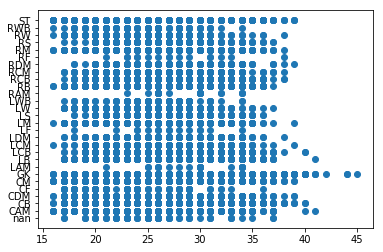

In [44]:
plt.scatter(data['Age'],data['Position'])
plt.show()

In [45]:
skills =[] 
for i in data.columns[18:44]:
    skills.append(i)

In [46]:

for i in skills:
    data[i]=data[i].fillna(method='ffill')
# print(data['LS'])

In [47]:
otherskills=[]
for i in data.columns[45:]:
    otherskills.append(i)

In [48]:
for i in otherskills:
    data[i]=data[i].fillna(data[i].mean())

In [49]:
data['Preferred Foot'] = data['Preferred Foot'].fillna('Right')

In [50]:
data['Contract Valid Until'].fillna(2022, inplace = True)
# data['Height'].fillna("5'9", inplace = True)
data['Joined'].fillna('Jul 1, 2018', inplace = True)
data['Jersey Number'].fillna(6, inplace = True)


In [51]:
data['Body Type']= data['Body Type'].fillna('Normal')
data['Position'] = data['Position'].fillna('ST')

In [52]:
data['Position'].mode()

0    ST
dtype: object

Plotting the data to know thw relations

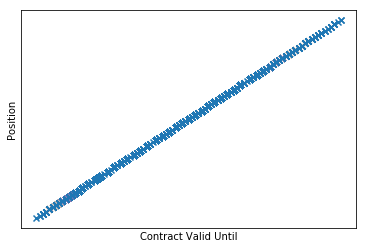

In [53]:
# checck corelated varible by plot

plt.scatter(data['LWB'],data['RWB'],marker = 'x')
plt.xlabel('Contract Valid Until')
plt.ylabel('Position')
plt.xticks([])
plt.yticks([])
plt.show()

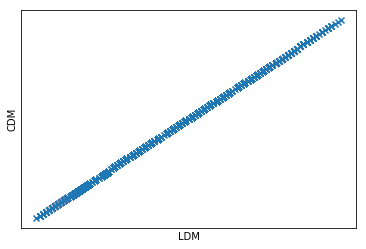

In [54]:
plt.scatter(data['LDM'],data['CDM'],marker = 'x')
plt.xlabel('LDM')
plt.ylabel('CDM')
plt.xticks([])
plt.yticks([])
plt.show()

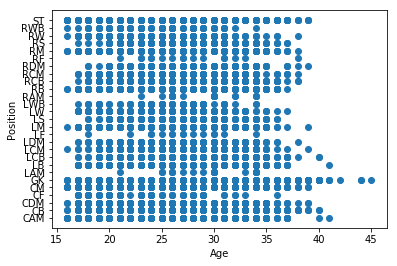

In [55]:
# plot Age
plt.scatter(data['Age'],data['Position'])
plt.xlabel('Age')
plt.ylabel('Position')
plt.show()

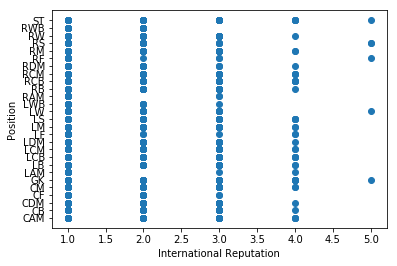

In [56]:

plt.scatter(data['International Reputation'],data['Position'])
plt.xlabel('International Reputation')
plt.ylabel('Position')
plt.show()

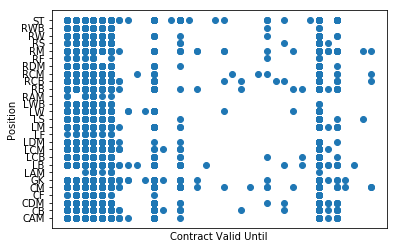

In [57]:
plt.scatter(data['Contract Valid Until'],data['Position'])
plt.xlabel('Contract Valid Until')
plt.ylabel('Position')
plt.xticks([])
plt.show()

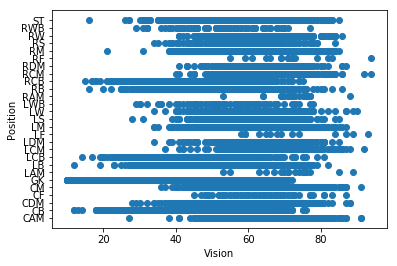

In [58]:
plt.scatter(data['Vision'],data['Position'])
plt.xlabel('Vision')
plt.ylabel('Position')
plt.show()

In [59]:
a=3
b=2
c=1


In [60]:
# skills of goalkeeper
data['GK_Overall'] = (b*data.Balance + b*data.Stamina + b*data.ShortPassing + c*data.Aggression + b*data.LongPassing + 
                      a*data.Agility + a*data.Reactions + a*data.Jumping +  b*data.Vision +  b*data.Composure +  
                      a*data.GKDiving +  a*data.GKHandling +  a*data.GKKicking+  a*data.GKPositioning+ 
                      a*data.GKReflexes + a*data.Strength + a*data.Overall + a*data["International Reputation"])

In [61]:
# skills of centre backard
data['CB_Overall'] = (a*data.Agility + a*data.Strength + a*data.Composure+ a*data.Aggression+ a*data.Balance+ a*data.Reactions+ 
                      a*data.StandingTackle+ a*data.SlidingTackle+ a*data.Marking+ a*data.Positioning
                     + a*data.Interceptions+ b*data.Jumping + b*data.BallControl + b*data.HeadingAccuracy +
                      b*data.LongPassing + b*data.ShortPassing+ b*data.Vision+ b*data.Stamina+ c*data.Dribbling + 
                      a*data.Overall + a*data['International Reputation'])

In [62]:
# data.head()

In [63]:
# fullbacks fetures
data["FullBacks"] = (a*data.SprintSpeed + a*data.Acceleration + a*data.Agility + a*data.Stamina + a*data.Aggression +
                    a*data.Positioning + a*data.Marking + a*data.SlidingTackle + a*data.StandingTackle + a*data.Crossing+ 
                    a*data.Dribbling + a*data.Reactions + 
                    b*data.Strength + b*data.BallControl + b*data.Curve + b*data.HeadingAccuracy +
                    b*data.Interceptions + b*data.Composure + b*data.Vision+ 
                    b*data.Jumping + b*data.Balance + b*data.LongPassing + b*data.ShortPassing +
                    c*data.Volleys )

In [64]:
#center defence midfilder
data['CDM_Overall'] = (a*data.ShortPassing + a*data.LongPassing +a*data.BallControl 
            +a*data.Composure + a*data.Balance
            +a*data.Positioning +a*data.Strength +
            a*data.Agility +a*data.Vision +
            b*data.Reactions + b*data.Dribbling +b*data.Acceleration +b*data.Stamina +
            b*data.LongShots +b*data.Interceptions +b*data.StandingTackle 
            +b*data.SlidingTackle +
            b*data.Marking +b*data.Jumping + b*data.HeadingAccuracy +
            c*data.Finishing)

In [65]:
#center midfilder
data['CM_Overall'] = (a*data.ShortPassing + a*data.LongPassing +a*data.BallControl 
            +a*data.Composure + a*data.Balance
            +a*data.Positioning +a*data.Strength +
            a*data.Agility +a*data.Vision +
            b*data.Reactions + b*data.Dribbling +b*data.Acceleration +b*data.Stamina +
            b*data.LongShots +b*data.Interceptions +b*data.StandingTackle 
            +b*data.SlidingTackle +
            b*data.Marking +b*data.Jumping + b*data.HeadingAccuracy +
            c*data.Finishing)

In [66]:
# center attcking
data['CAM_Overall'] = (a*data.Marking + a*data.Positioning +a*data.BallControl
                       +a*data.ShortPassing + a*data.Dribbling +a*data.Agility
                       +a*data.Composure +a*data.Stamina +
                       a*data.LongShots +a*data.Aggression +a*data.Vision
                       +a*data.Acceleration + b*data.Finishing + b*data.Crossing
                       + b*data.HeadingAccuracy+ b*data.ShotPower + b*data.SprintSpeed
                       + b*data.Curve+ b*data.Volleys + c*data.Strength + 
                       c*data.StandingTackle + c*data.SlidingTackle)

In [67]:
# winger
data['W_Overall'] = (a*data.Crossing + a*data.Dribbling +a*data.Aggression +
                      a*data.Stamina +a*data.Agility +a*data.BallControl +
                      a*data.Curve +a*data.Balance +a*data.Positioning +
                      a*data.Marking +a*data.SprintSpeed +a*data.Acceleration +
                      b*data.Strength + b*data.ShotPower +b*data.Finishing +
                      b*data.ShortPassing +b*data.Volleys +b*data.Vision +
                      b*data.Interceptions + c*data.Jumping)

In [68]:
# striker

data['ST_Overall'] = (a*data.Finishing + a*data.HeadingAccuracy +a*data.Volleys +
                      a*data.BallControl +a*data.Composure +a*data.Balance +
                      a*data.Strength +a*data.Positioning +a*data.Jumping +
                      a*data.ShotPower +a*data.Agility +a*data.Acceleration +
                      b*data.Dribbling + b*data.ShortPassing +b*data.Curve +
                      b*data.SprintSpeed +b*data.Stamina +b*data.Aggression +
                      c*data.Crossing)


CONVERTING TO CATEGORICAL VALUES

In [69]:
data.tail(3)

Age  Overall  Potential    Value    Wage  Special Preferred Foot  \
18204   16       47         67  60000.0  1000.0     1189          Right   
18205   17       47         66  60000.0  1000.0     1228          Right   
18206   16       46         66  60000.0  1000.0     1321          Right   

       International Reputation  Weak Foot  Skill Moves       Work Rate  \
18204                       1.0        3.0          2.0  Medium/ Medium   
18205                       1.0        3.0          2.0  Medium/ Medium   
18206                       1.0        3.0          2.0  Medium/ Medium   

      Body Type Position  Jersey Number        Joined Contract Valid Until  \
18204    Normal       ST           33.0   Jul 1, 2017                 2021   
18205      Lean       RW           34.0  Apr 24, 2018                 2019   
18206      Lean       CM           33.0  Oct 30, 2018                 2019   

       Height  Weight    LS    ST    RS    LW    LF    CF    RF    RW   LAM  \
18204      68     148  45+2  45+2  45+2  45+2  46+2  46+2  46+2  45+2  44+2   
18205      70     154  47+2  47+2  47+2  47+2  46+2  46+2  46+2  47+2  45+2   
18206      70     176  43+2  43+2  43+2  45+2  44+2  44+2  44+2  45+2  45+2   

        CAM   RAM    LM   LCM    CM   RCM    RM   LWB   LDM   CDM   RDM   RWB  \
18204  44+2  44+2  44+2  38+2  38+2  38+2  44+2  34+2  30+2  30+2  30+2  34+2   
18205  45+2  45+2  46+2  39+2  39+2  39+2  46+2  36+2  32+2  32+2  32+2  36+2   
18206  45+2  45+2  46+2  45+2  45+2  45+2  46+2  46+2  46+2  46+2  46+2  46+2   

         LB   LCB    CB   RCB    RB  Crossing  Finishing  HeadingAccuracy  \
18204  33+2  28+2  28+2  28+2  33+2      25.0       40.0             46.0   
18205  35+2  31+2  31+2  31+2  35+2      44.0       50.0             39.0   
18206  46+2  47+2  47+2  47+2  46+2      41.0       34.0             46.0   

       ShortPassing  Volleys  Dribbling  Curve  FKAccuracy  LongPassing  \
18204          38.0     38.0       45.0   38.0        27.0         28.0   
18205          42.0     40.0       51.0   34.0        32.0         32.0   
18206          48.0     30.0       43.0   40.0        34.0         44.0   

       BallControl  Acceleration  SprintSpeed  Agility  Reactions  Balance  \
18204         44.0          70.0         69.0     50.0       47.0     58.0   
18205         52.0          61.0         60.0     52.0       21.0     71.0   
18206         51.0          57.0         55.0     55.0       51.0     63.0   

       ShotPower  Jumping  Stamina  Strength  LongShots  Aggression  \
18204       45.0     60.0     55.0      32.0       45.0        32.0   
18205       64.0     42.0     40.0      48.0       34.0        33.0   
18206       43.0     62.0     47.0      60.0       32.0        56.0   

       Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
18204           15.0         48.0    43.0       55.0       41.0     32.0   
18205           22.0         44.0    47.0       50.0       46.0     20.0   
18206           42.0         34.0    49.0       33.0       43.0     40.0   

       StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
18204            13.0           11.0       6.0         5.0       10.0   
18205            25.0           27.0      14.0         6.0       14.0   
18206            43.0           50.0      10.0        15.0        9.0   

       GKPositioning  GKReflexes  Release Clause    BMI  FitnessLevel  \
18204            6.0        13.0        165000.0  22.50             2   
18205            8.0         9.0        143000.0  22.09             2   
18206           12.0         9.0        165000.0  25.25             3   

       GK_Overall  CB_Overall  FullBacks  CDM_Overall  CM_Overall  \
18204      1389.0      1954.0     2415.0       2064.0      2064.0   
18205      1375.0      2010.0     2424.0       2116.0      2116.0   
18206      1634.0      2489.0     2842.0       2401.0      2401.0   

       CAM_Overall  W_Overall  ST_Overall  
18204       2287.0     2260.0 

In [70]:
# converting to single values


# onlu one time

for i in data.columns[18:44]:
    data1['l1'] = (data[i].str[0:2]).astype(int)
    data1['l2'] = (data[i].str[-1]).astype(int) 
    data[i] = data1['l1'] + data1['l2']

In [71]:
# data.drop(['l1','l2'],axis=1)

In [72]:
data.head(3)

Age  Overall  Potential        Value      Wage  Special Preferred Foot  \
0   31       94         94  110500000.0  565000.0     2202           Left   
1   33       94         94   77000000.0  405000.0     2228          Right   
2   26       92         93  118500000.0  290000.0     2143          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate  \
0                       5.0        4.0          4.0  Medium/ Medium   
1                       5.0        4.0          5.0       High/ Low   
2                       5.0        5.0          5.0    High/ Medium   

    Body Type Position  Jersey Number        Joined Contract Valid Until  \
0       Messi       RF           10.0   Jul 1, 2004                 2021   
1  C. Ronaldo       ST            7.0  Jul 10, 2018                 2022   
2      Neymar       LW           10.0   Aug 3, 2017                 2022   

   Height  Weight  LS  ST  RS  LW  LF  CF  RF  RW  LAM  CAM  RAM  LM  LCM  CM  \
0      67     159  90  90  90  94  95  95  95  94   95   95   95  93   86  86   
1      74     183  94  94  94  92  93  93  93  92   91   91   91  91   84  84   
2      69     150  87  87  87  92  92  92  92  92   92   92   92  91   84  84   

   RCM  RM  LWB  LDM  CDM  RDM  RWB  LB  LCB  CB  RCB  RB  Crossing  \
0   86  93   66   63   63   63   66  61   49  49   49  61      84.0   
1   84  91   68   64   64   64   68  64   56  56   56  64      84.0   
2   84  91   68   63   63   63   68  63   50  50   50  63      79.0   

   Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0       95.0             70.0          90.0     86.0       97.0   93.0   
1       94.0             89.0          81.0     87.0       88.0   81.0   
2       87.0             62.0          84.0     84.0       96.0   88.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  SprintSpeed  Agility  \
0        94.0         87.0         96.0          91.0         86.0     91.0   
1        76.0         77.0         94.0          89.0         91.0     87.0   
2        87.0         78.0         95.0          94.0         90.0     96.0   

   Reactions  Balance  ShotPower  Jumping  Stamina  Strength  LongShots  \
0       95.0     95.0       85.0     68.0     72.0      59.0       94.0   
1       96.0     70.0       95.0     95.0     88.0      79.0       93.0   
2       94.0     84.0       80.0     61.0     81.0      49.0       82.0   

   Aggression  Interceptions  Positioning  Vision  Penalties  Composure  \
0        48.0           22.0         94.0    94.0       75.0       96.0   
1        63.0           29.0         95.0    82.0       85.0       95.0   
2        56.0           36.0         89.0    87.0       81.0       94.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   

   GKPositioning  GKReflexes  Release Clause    BMI  FitnessLevel  GK_Overall  \
0           14.0         8.0     226500000.0  24.90             2      2514.0   
1           14.0        11.0     127100000.0  23.49             2      2591.0   
2           15.0        11.0     228100000.0  22.15             2      2440.0   

   CB_Overall  FullBacks  CDM_Overall  CM_Overall  CAM_Overall  W_Overall  \
0      3609.0     4361.0       3893.0      3893.0       4299.0     4070.0   
1      3685.0     4420.0       3872.0      3872.0       4324.0     4063.0   
2      3529.0     4297.0       3735.0      3735.0       4189.0     4000.0   

   ST_Overall  
0      4134.0  
1      4275.0  
2      3994.0

In [73]:
# only one time
n = LabelEncoder()
for i in data.columns:

    data[i] = n.fit_transform(data[i].astype('str'))
    if i =='Position':
        label = n.inverse_transform(data['Position'])


In [74]:

label

array(['RF', 'ST', 'LW', ..., 'ST', 'RW', 'CM'], dtype=object)

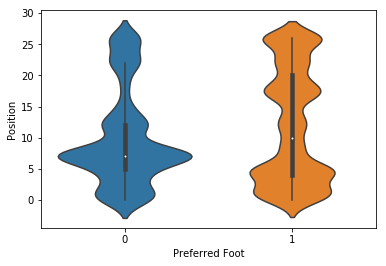

In [75]:
# 
sns.violinplot(data['Preferred Foot'],data['Position'])
plt.show()

In [76]:
# For plotting data distribution

def plot(i):
    sns.distplot(data[i], fit = stats.norm)
    fig = plt.figure(figsize=(8,6))
    res = stats.probplot(data[i], plot=plt)
    plt.show()

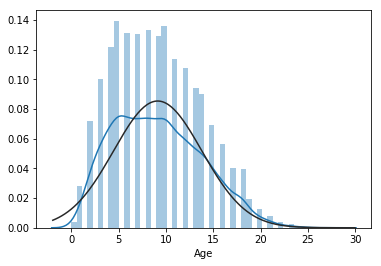

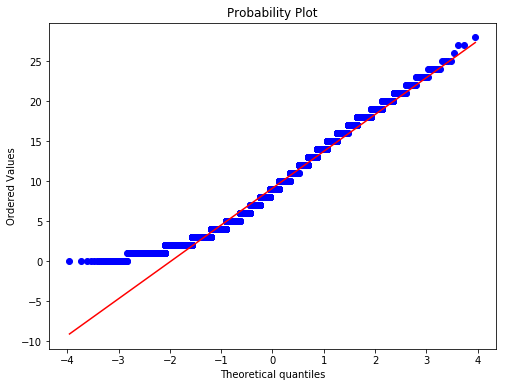

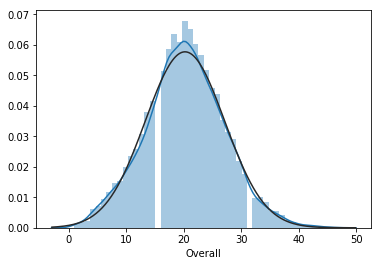

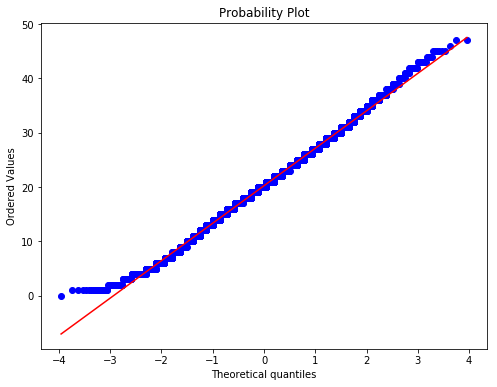

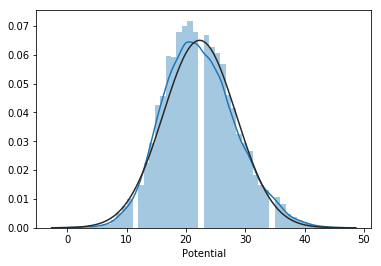

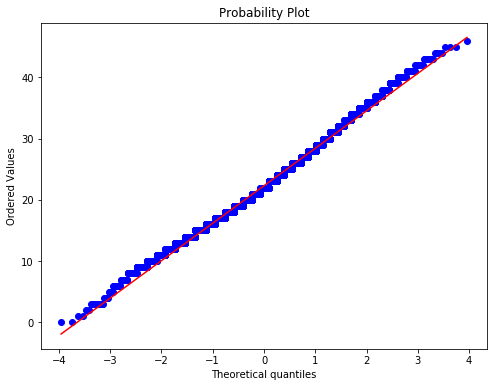

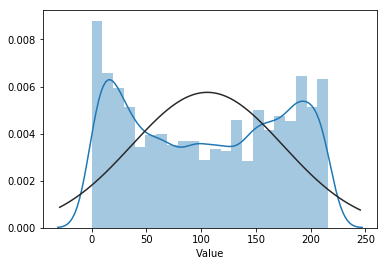

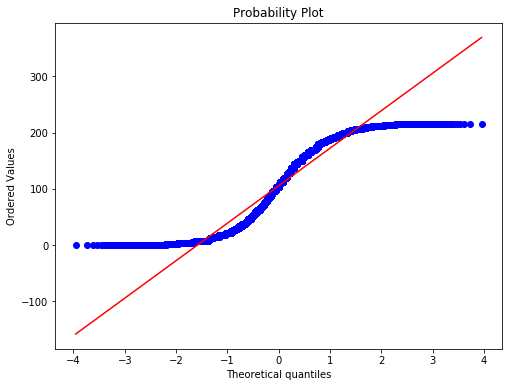

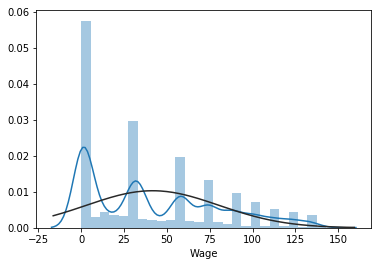

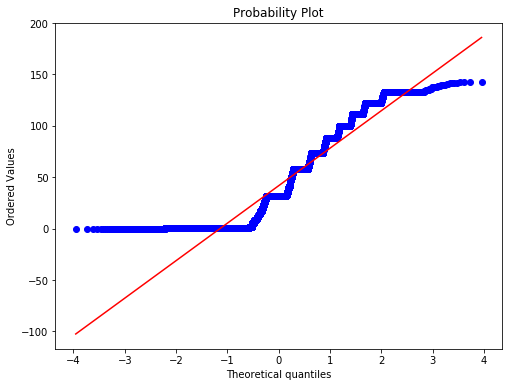

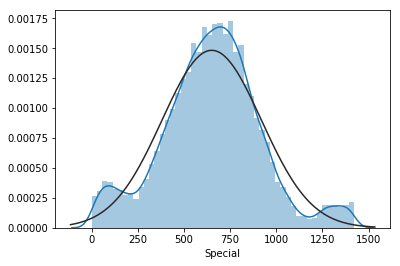

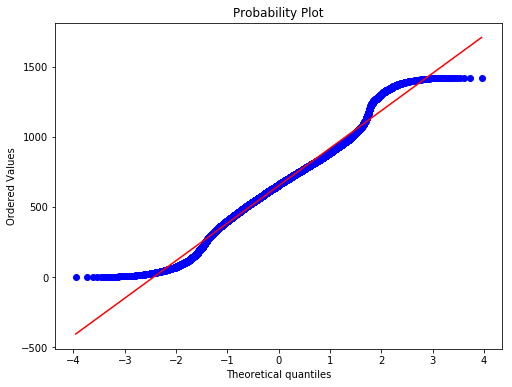

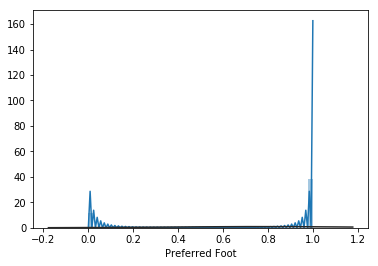

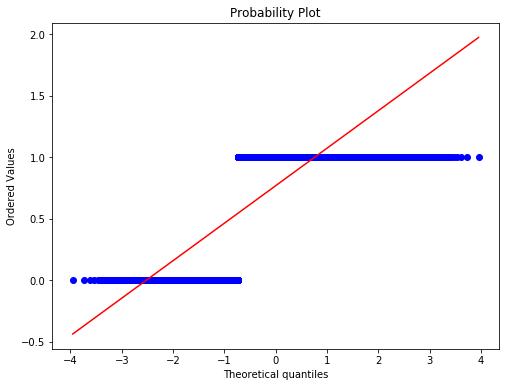

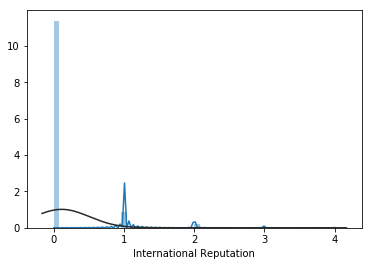

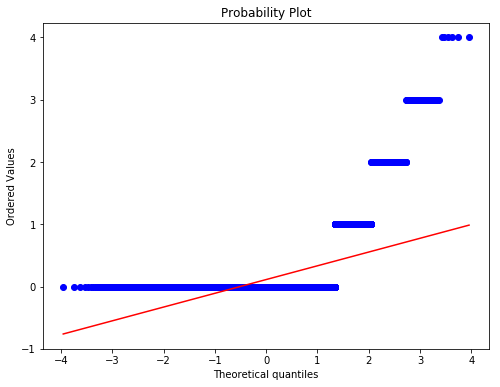

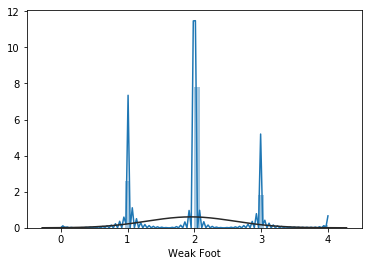

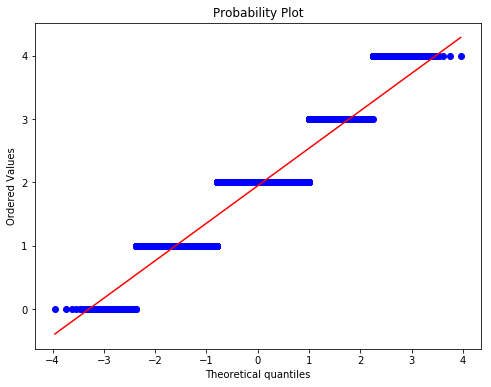

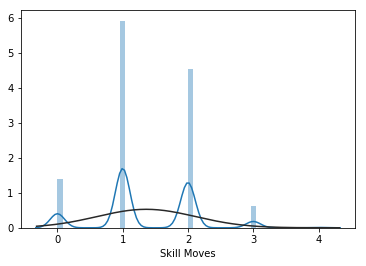

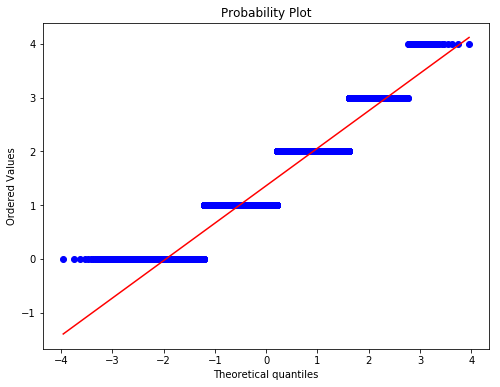

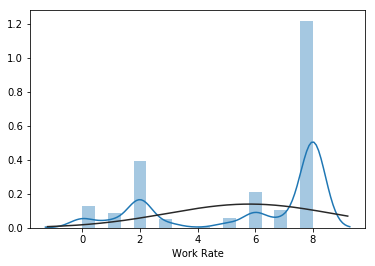

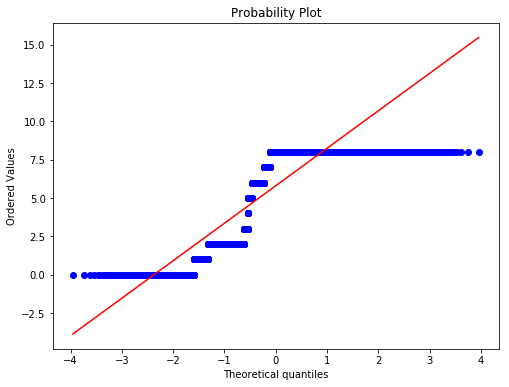

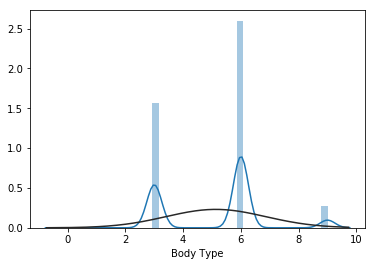

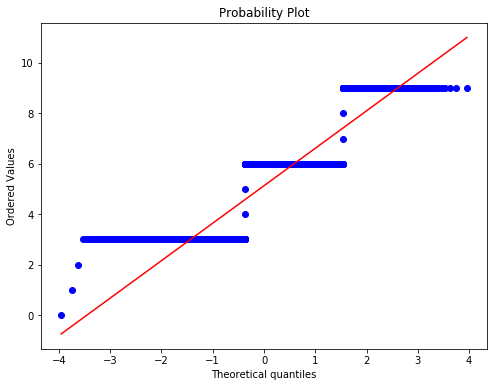

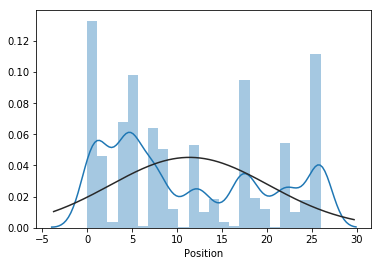

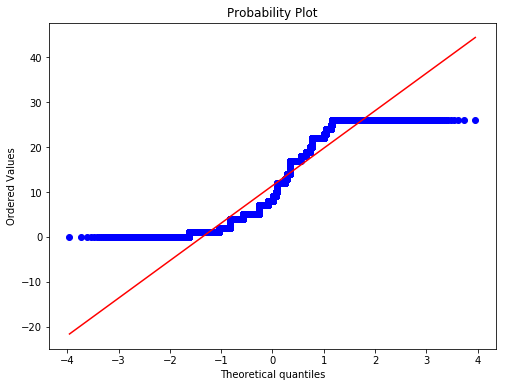

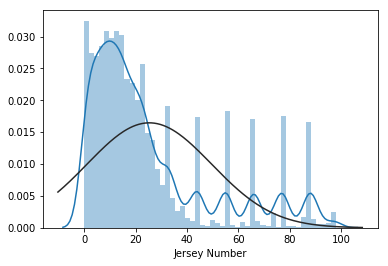

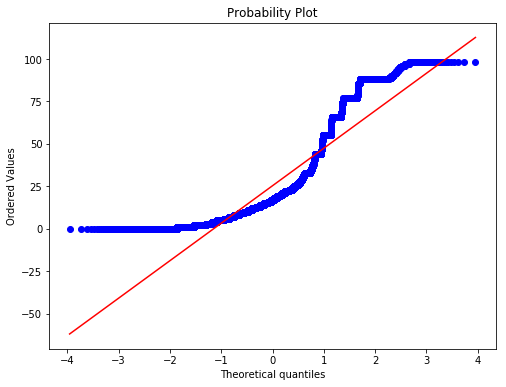

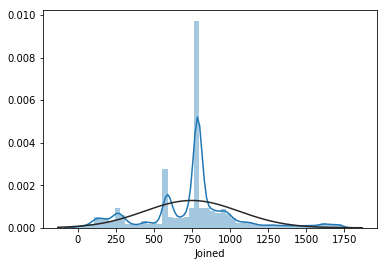

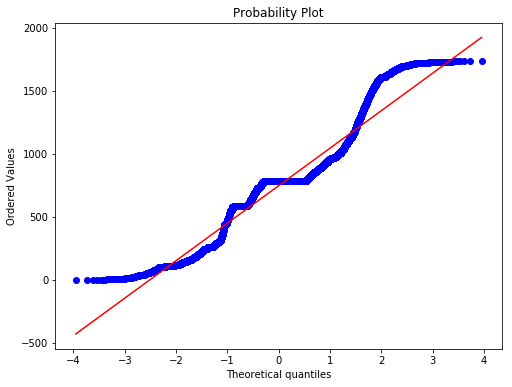

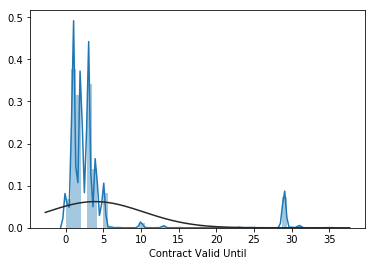

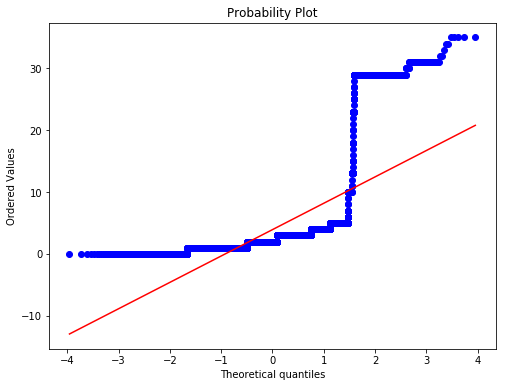

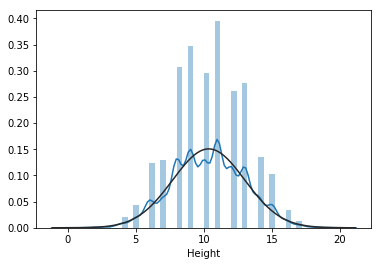

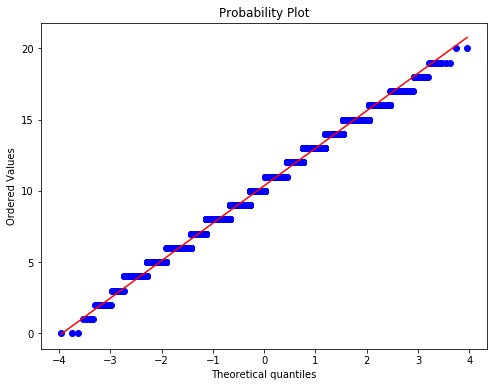

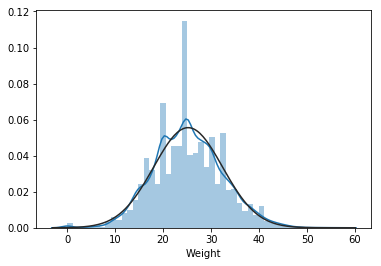

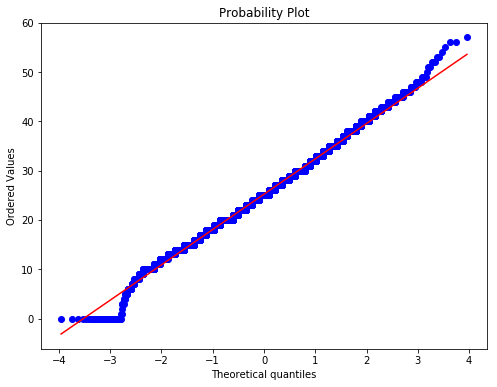

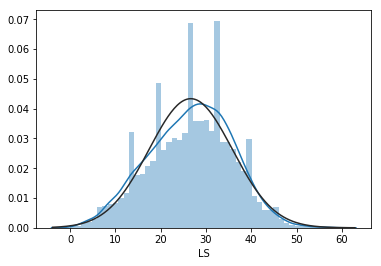

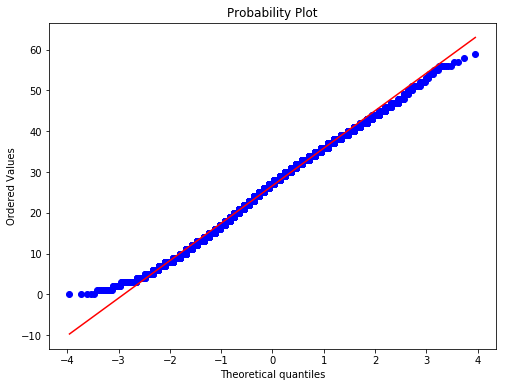

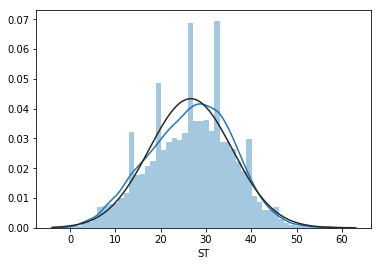

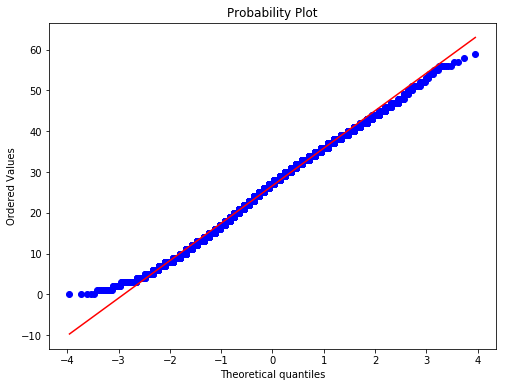

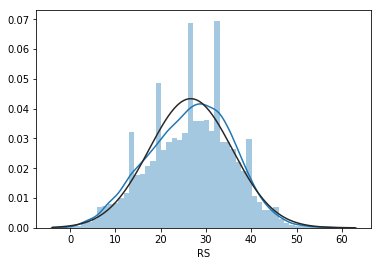

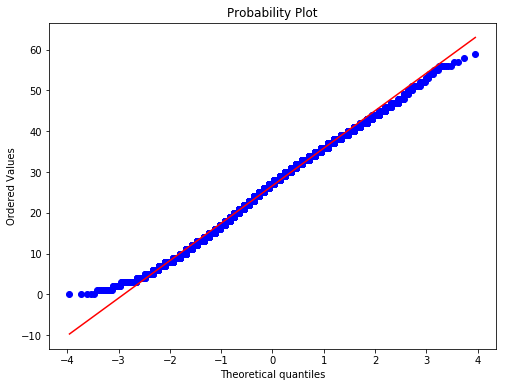

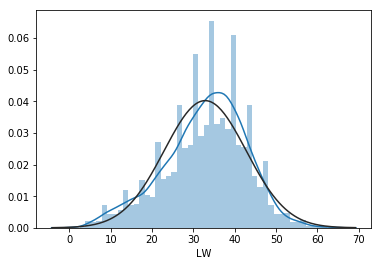

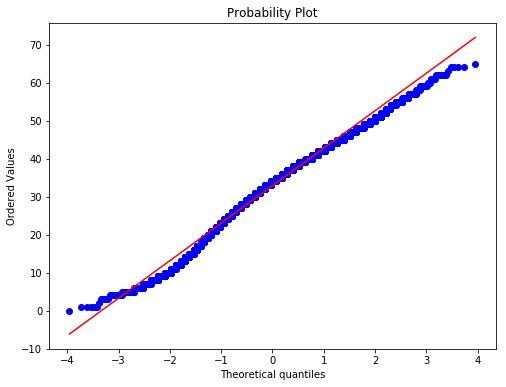

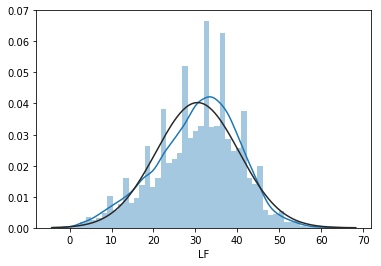

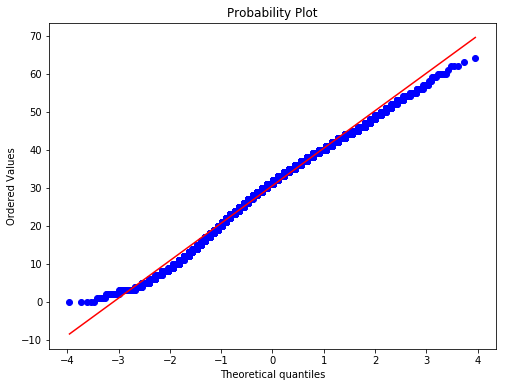

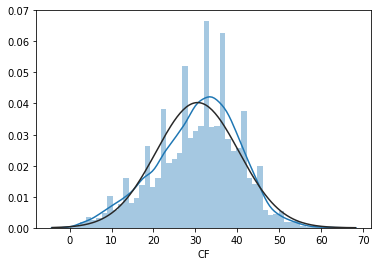

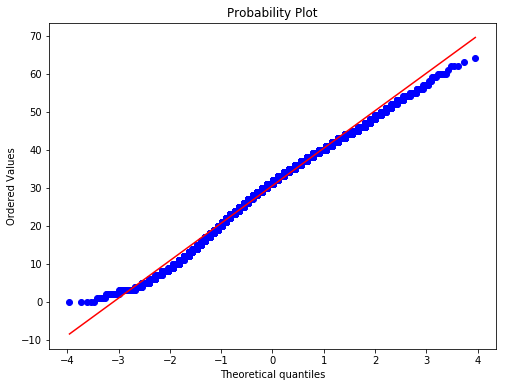

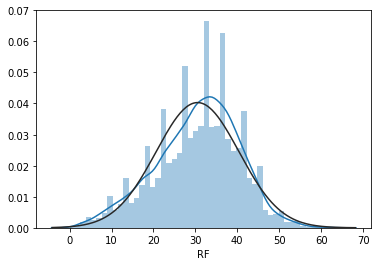

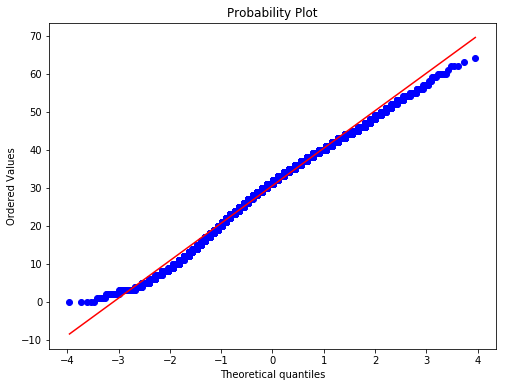

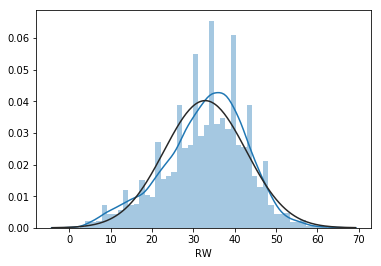

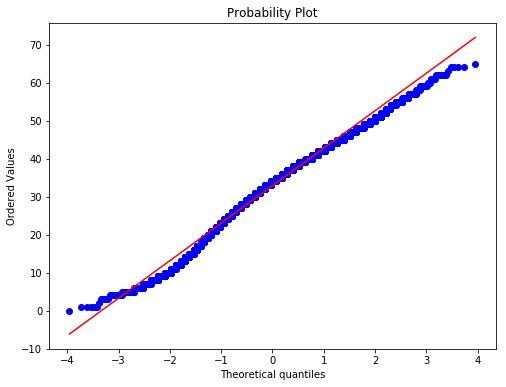

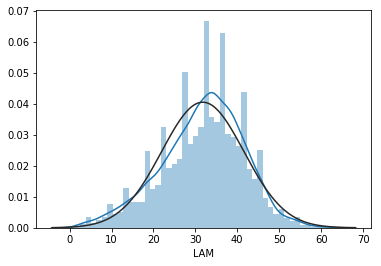

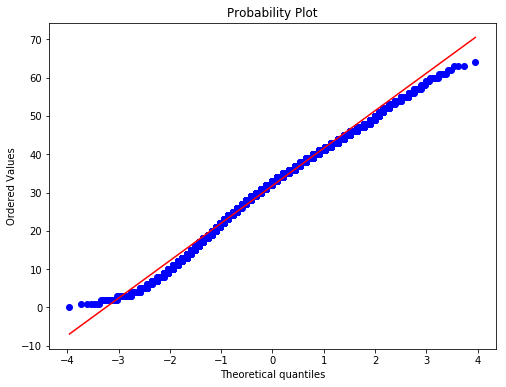

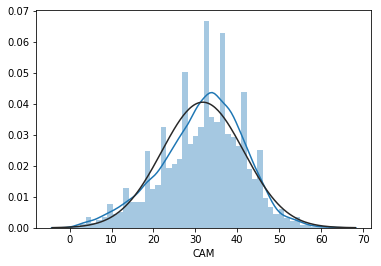

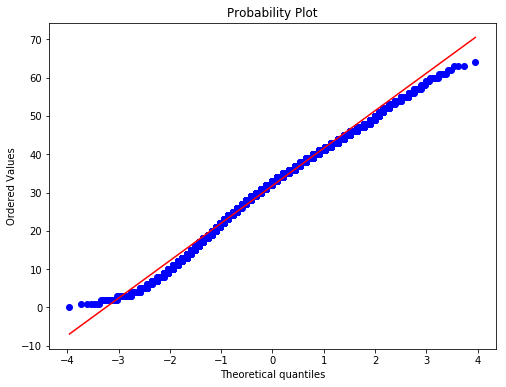

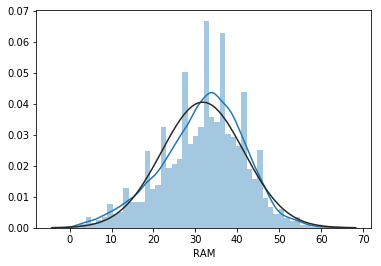

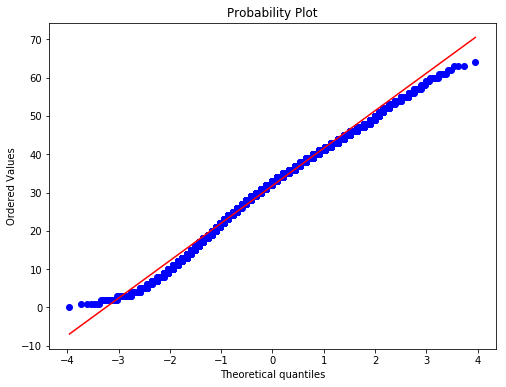

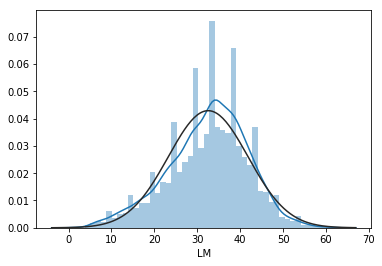

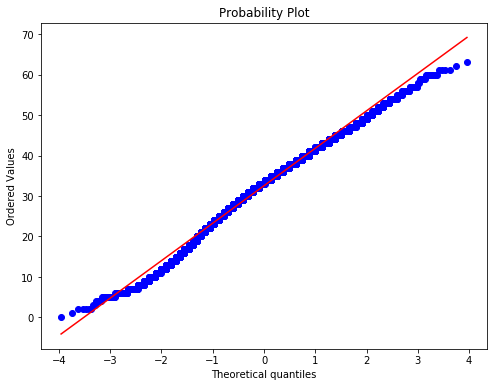

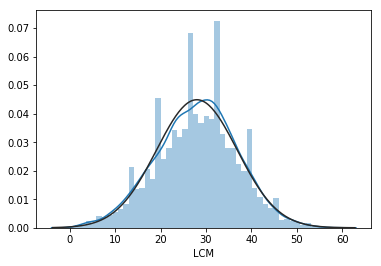

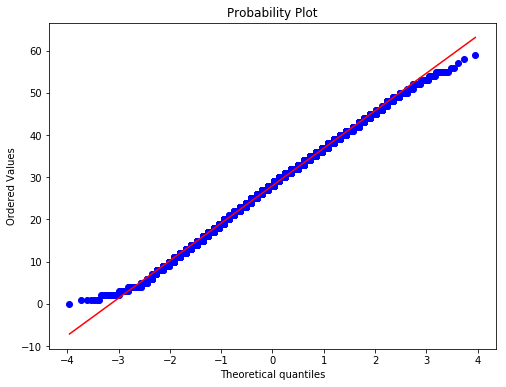

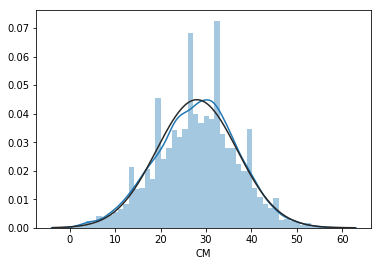

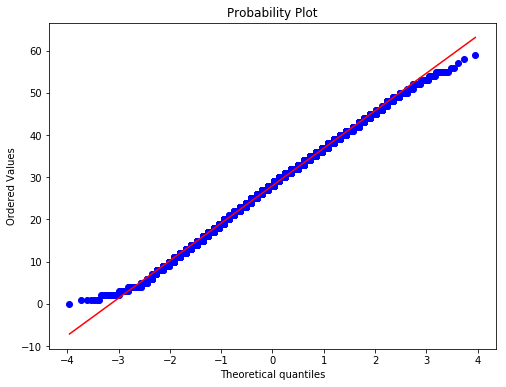

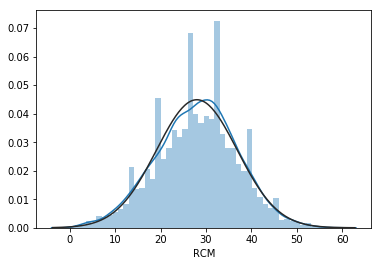

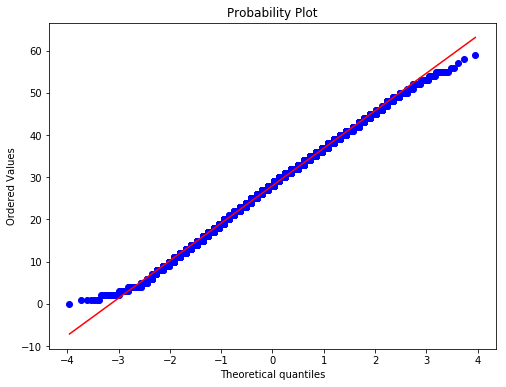

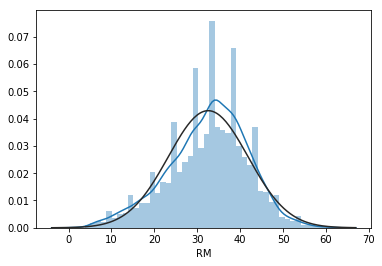

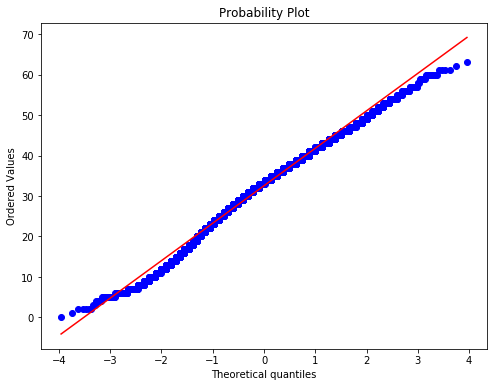

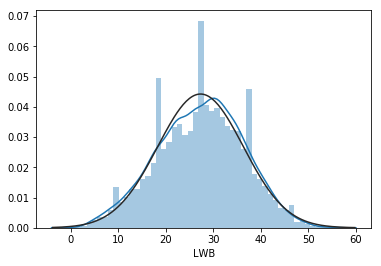

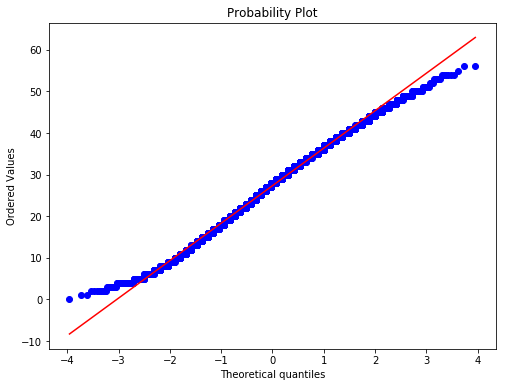

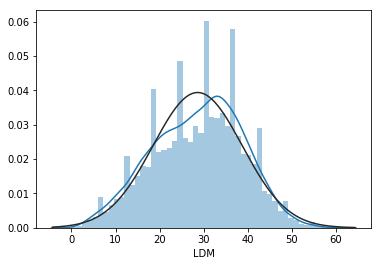

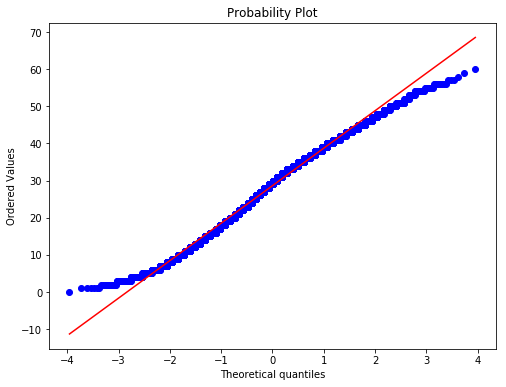

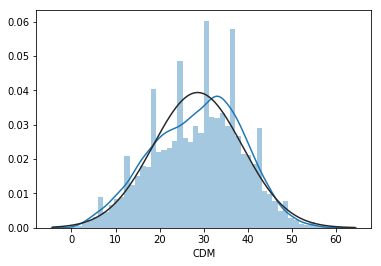

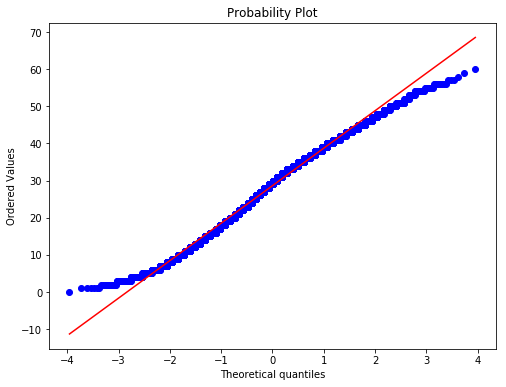

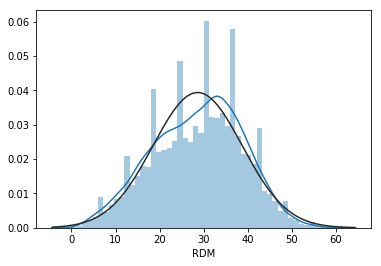

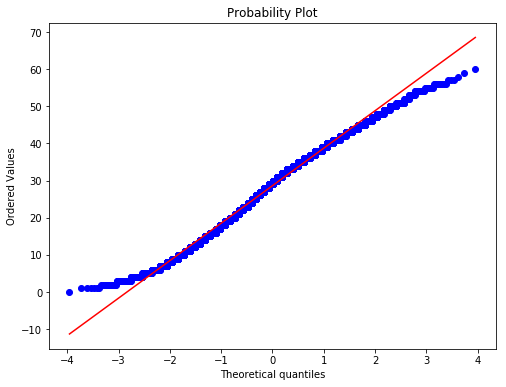

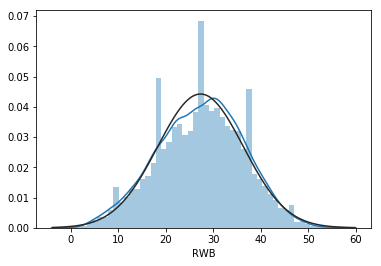

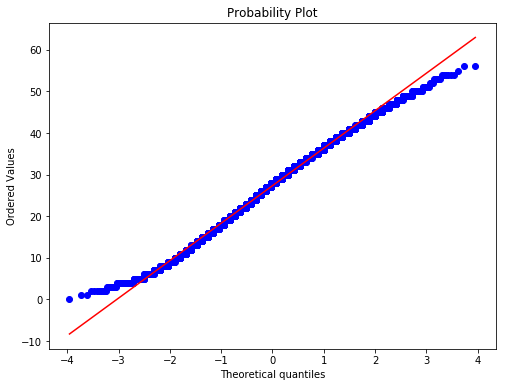

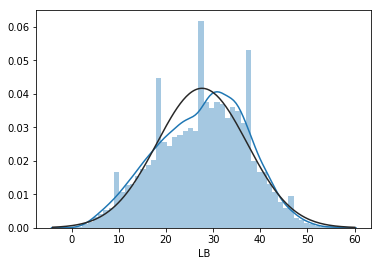

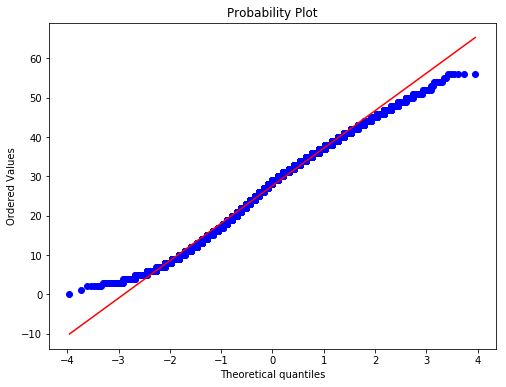

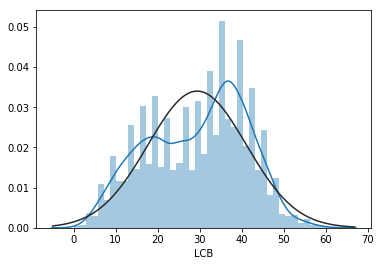

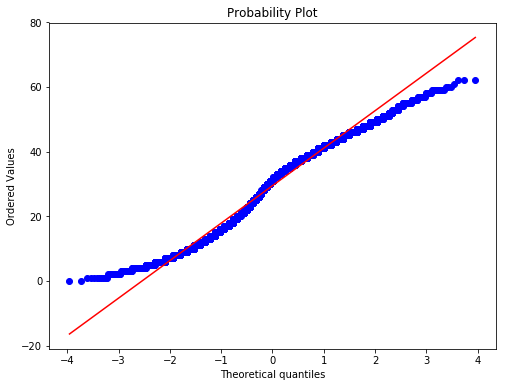

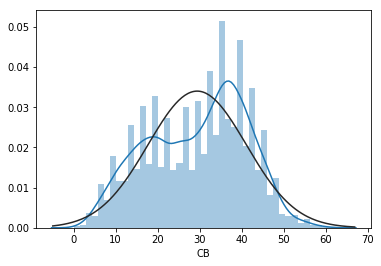

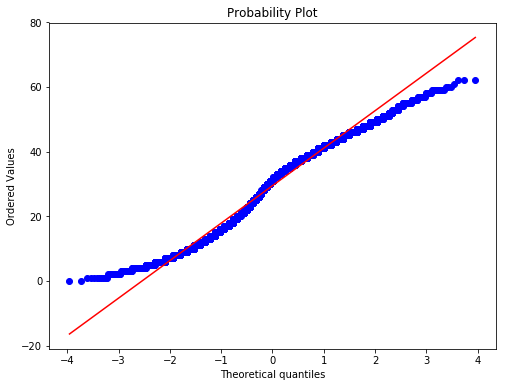

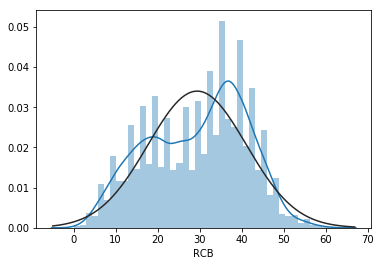

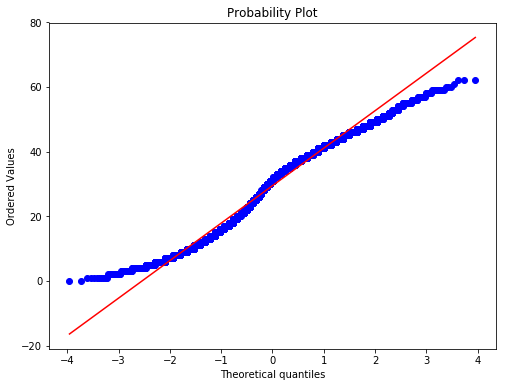

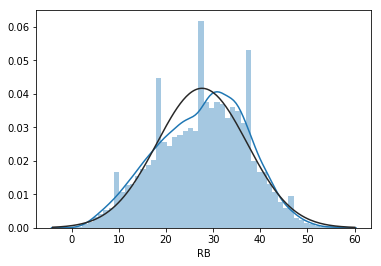

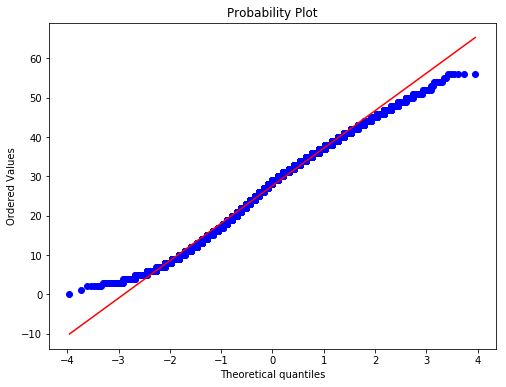

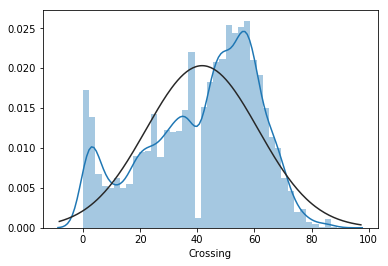

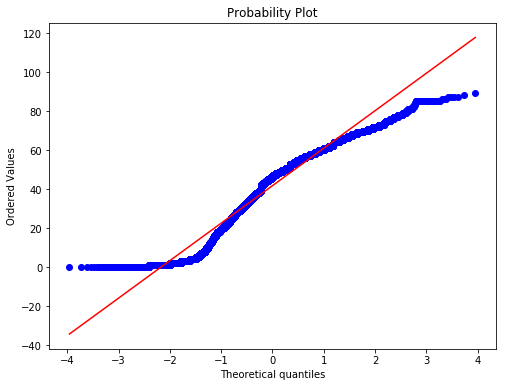

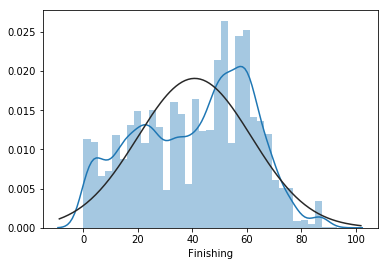

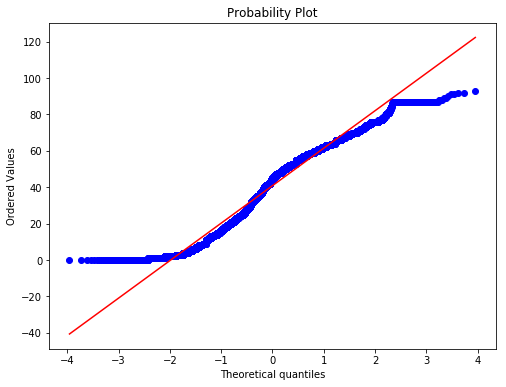

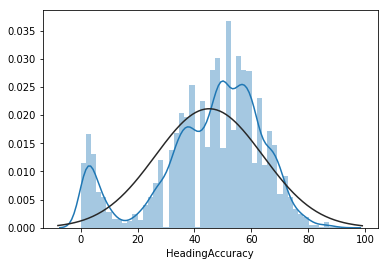

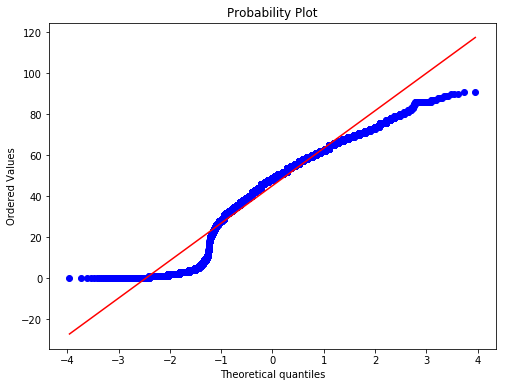

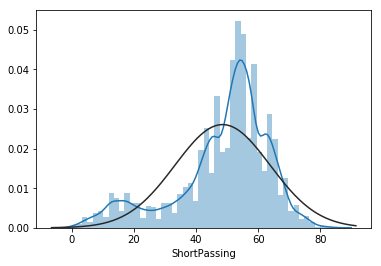

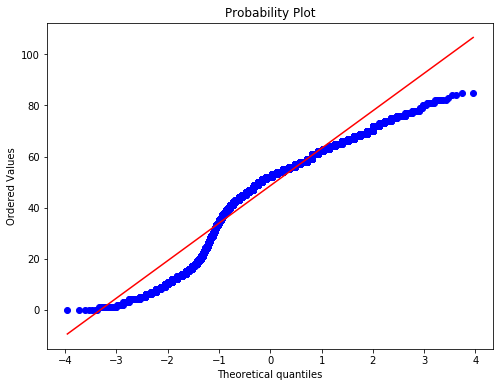

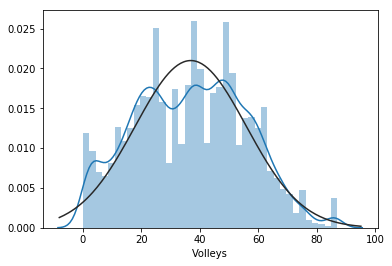

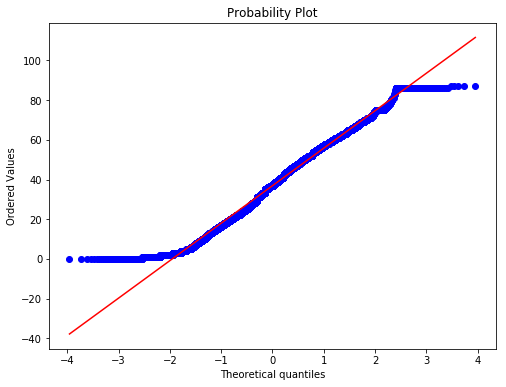

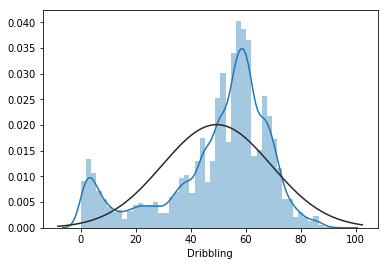

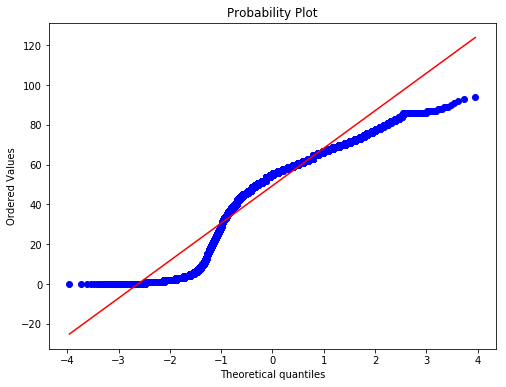

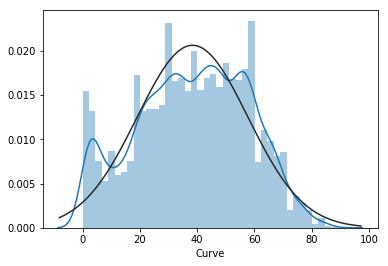

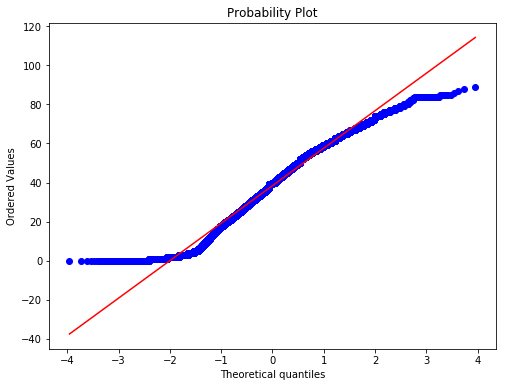

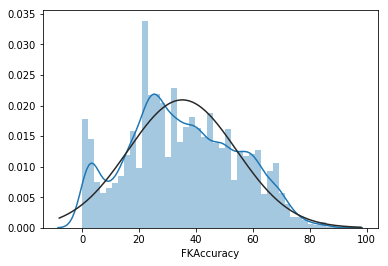

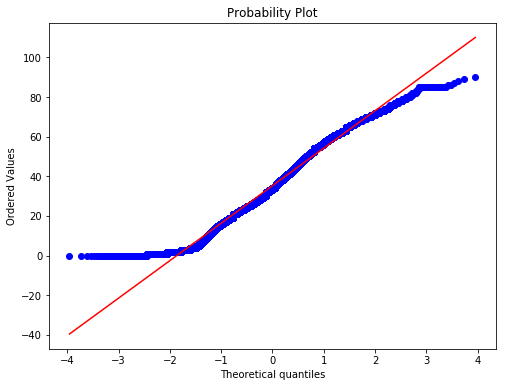

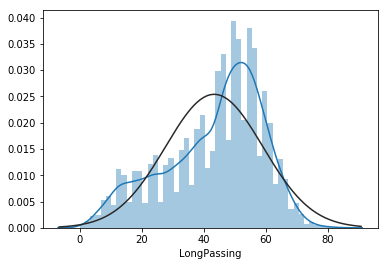

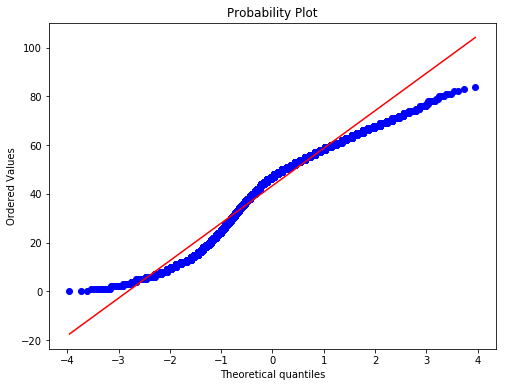

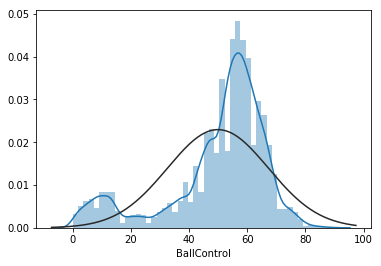

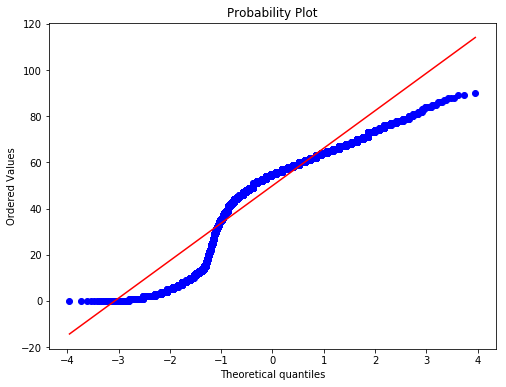

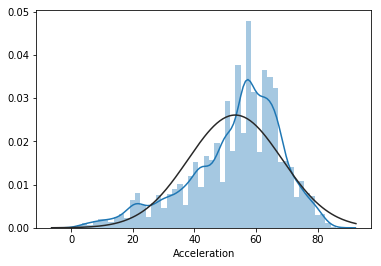

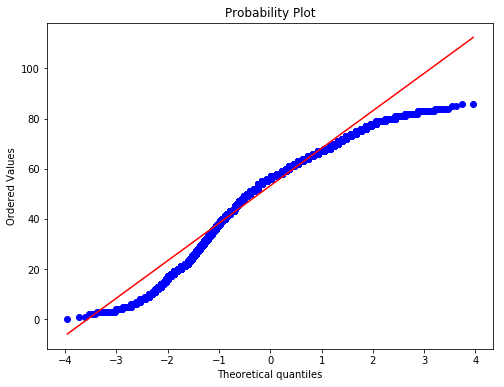

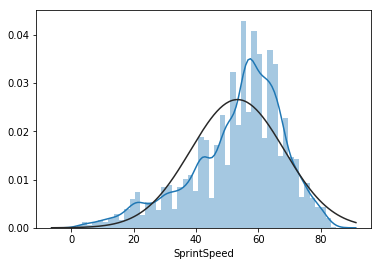

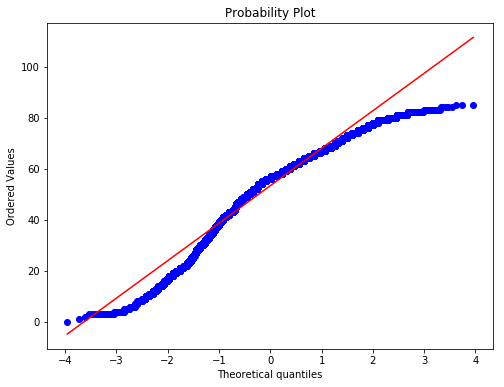

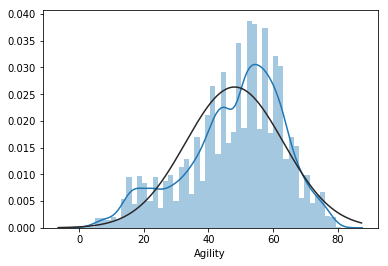

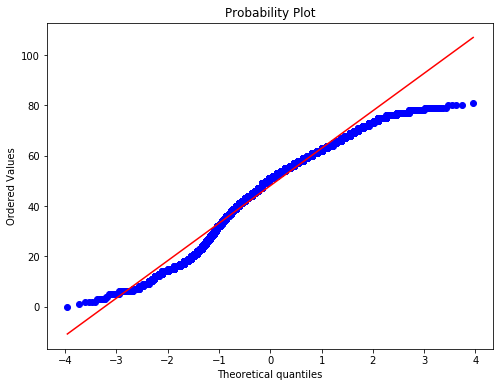

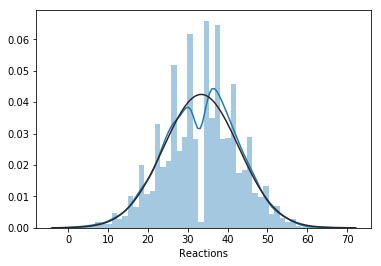

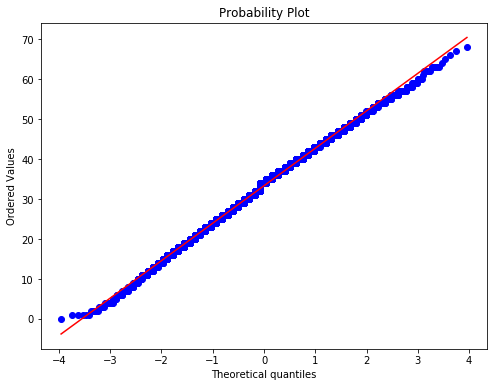

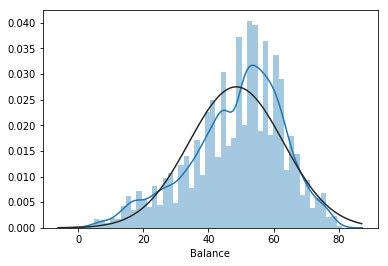

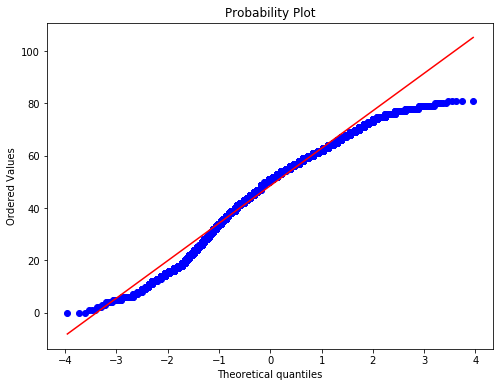

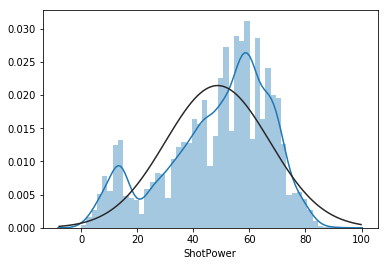

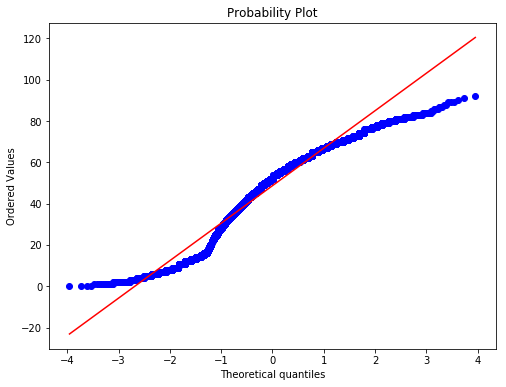

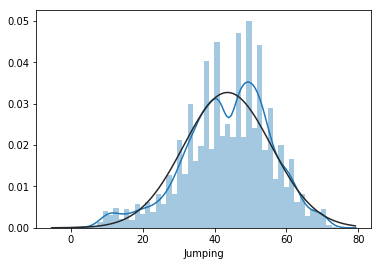

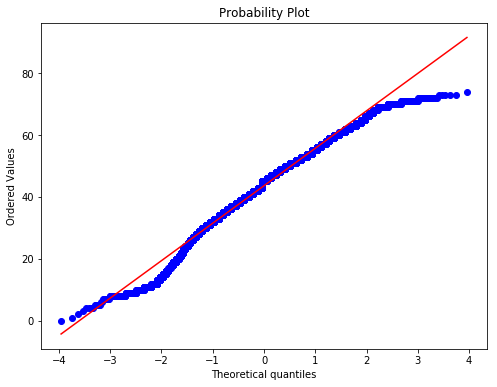

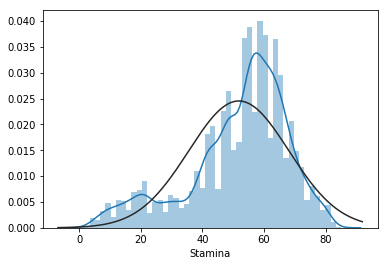

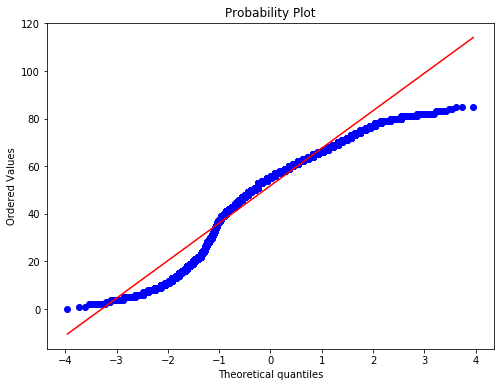

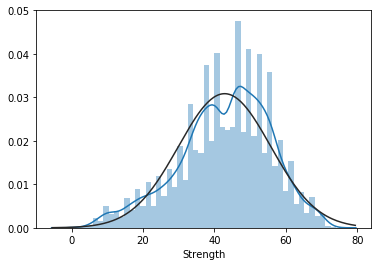

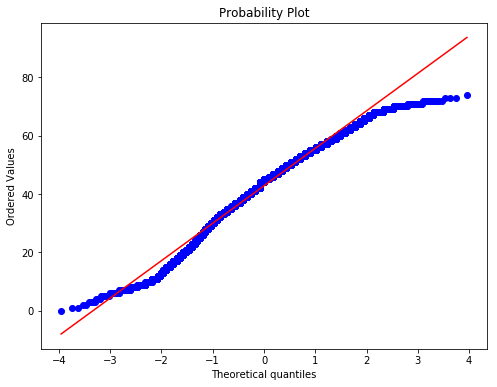

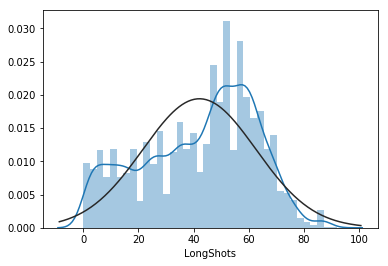

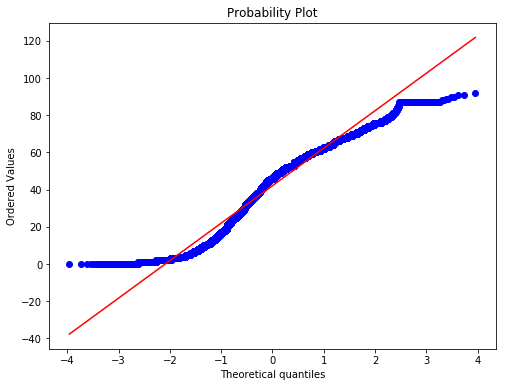

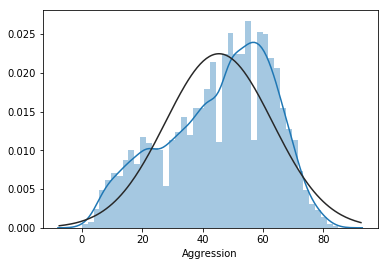

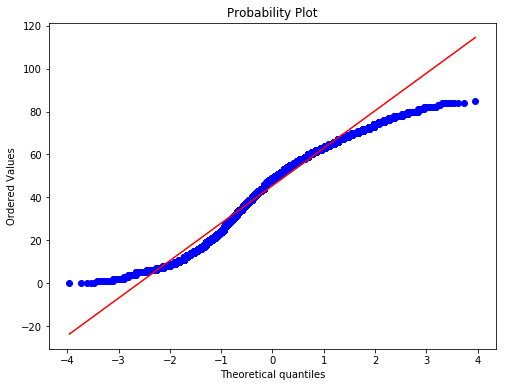

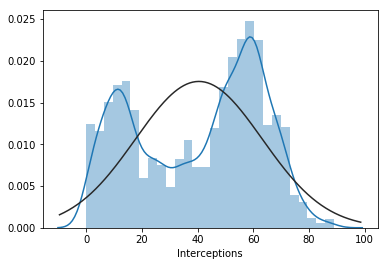

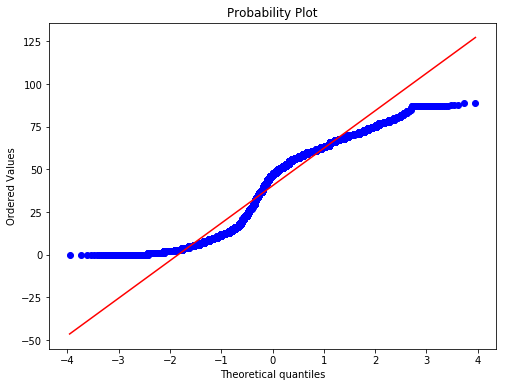

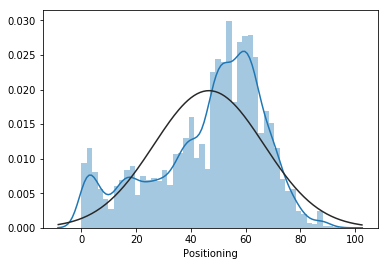

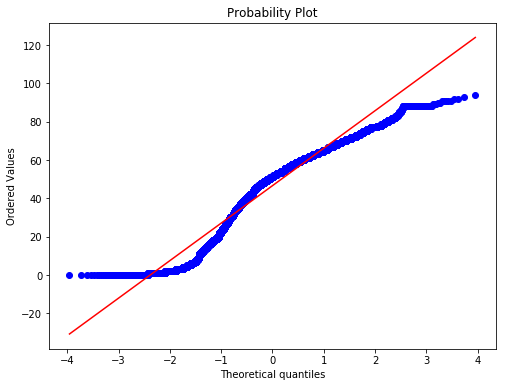

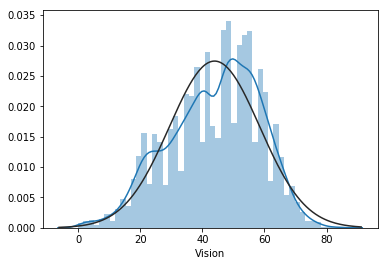

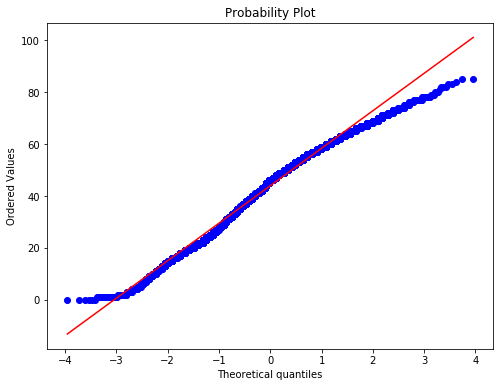

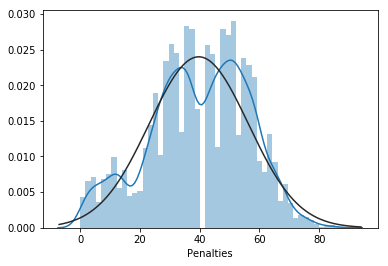

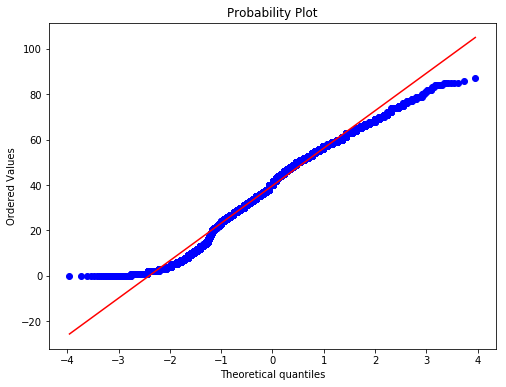

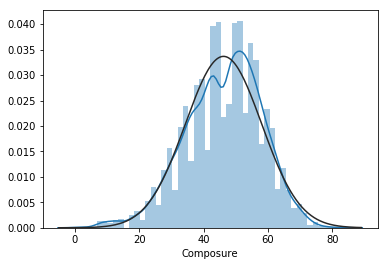

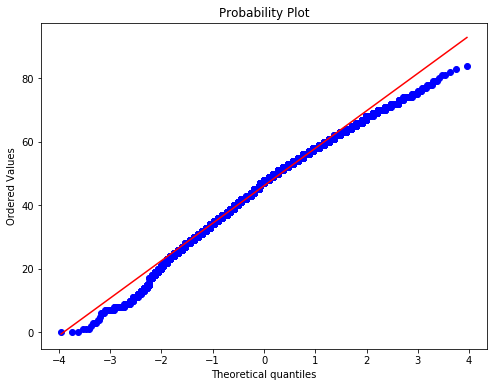

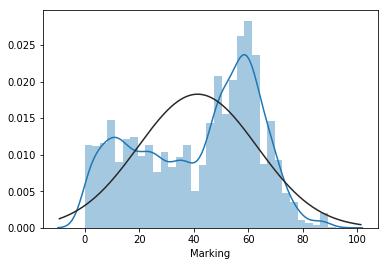

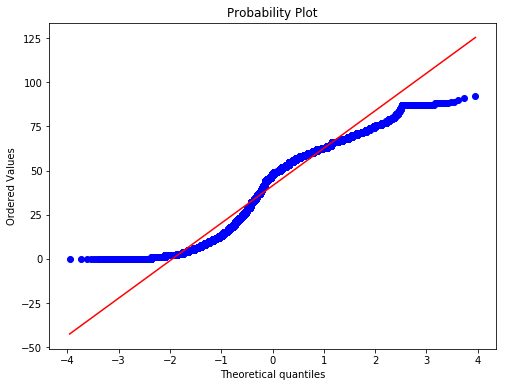

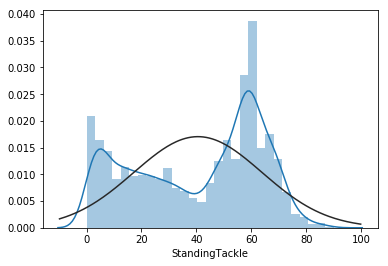

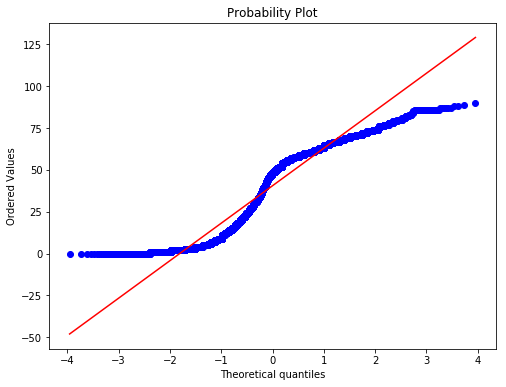

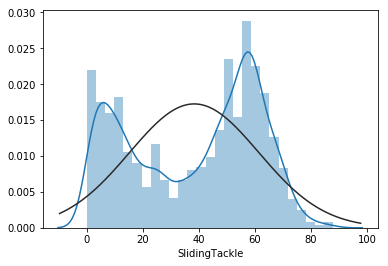

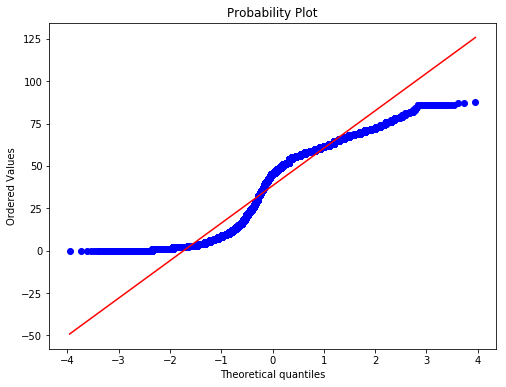

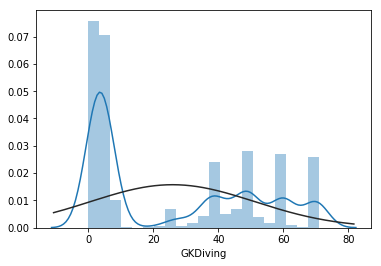

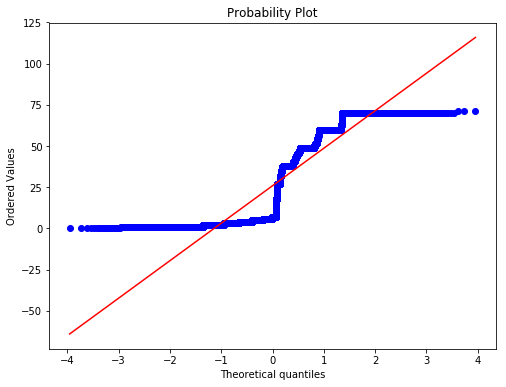

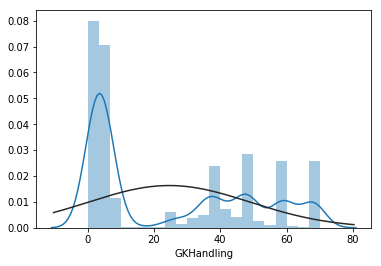

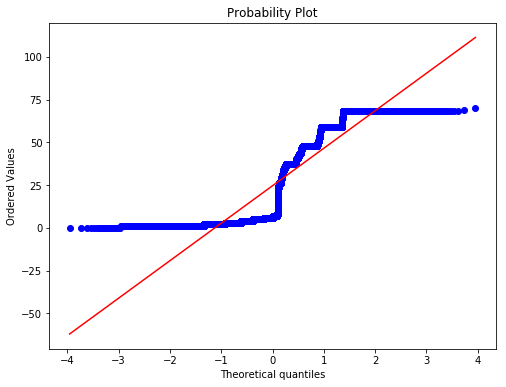

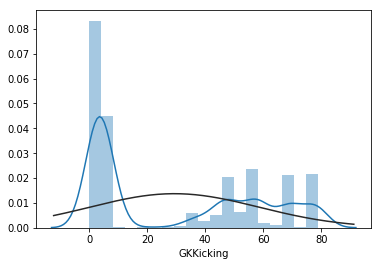

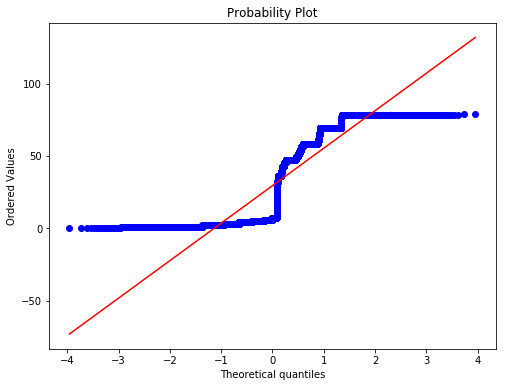

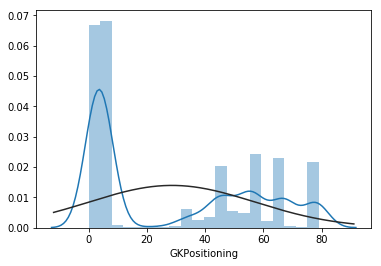

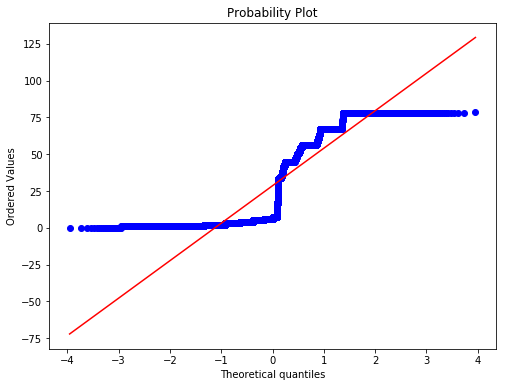

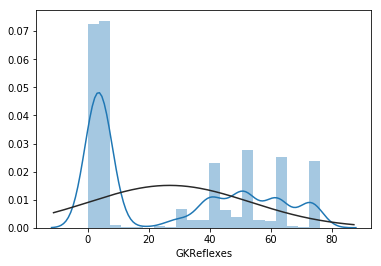

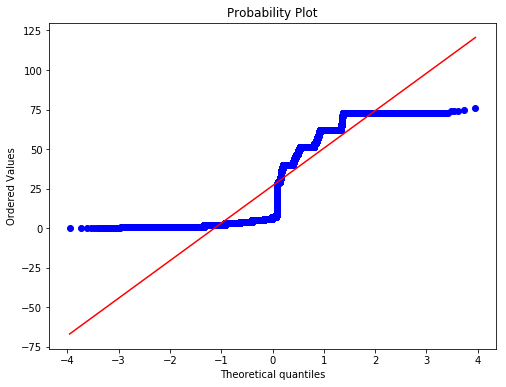

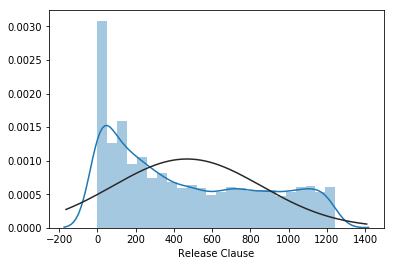

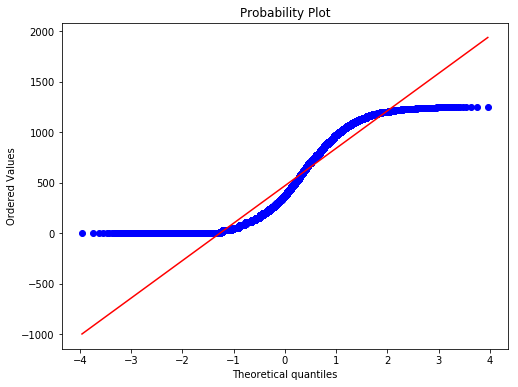

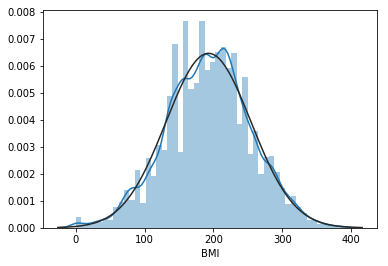

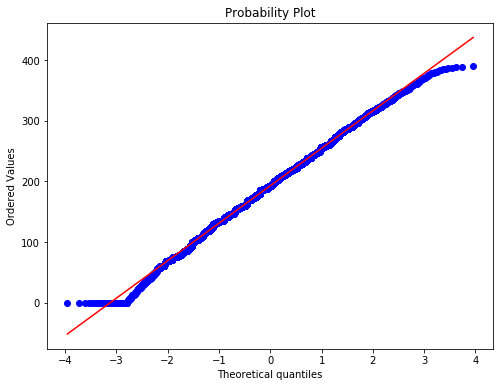

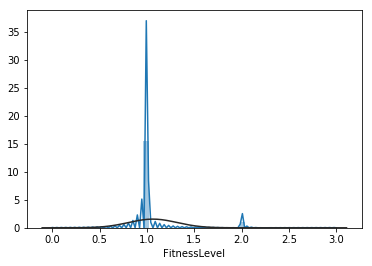

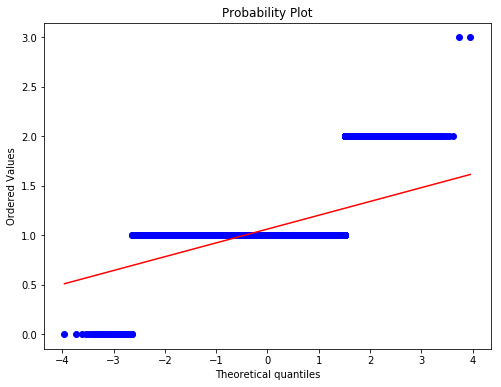

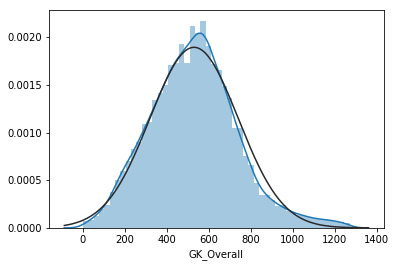

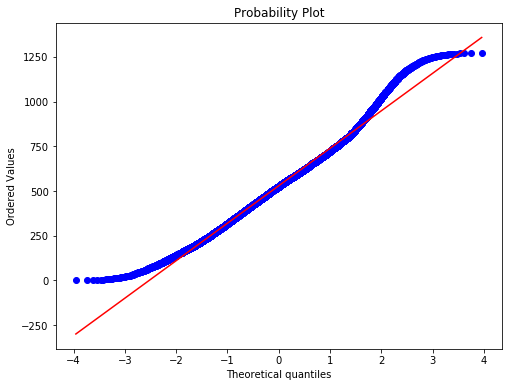

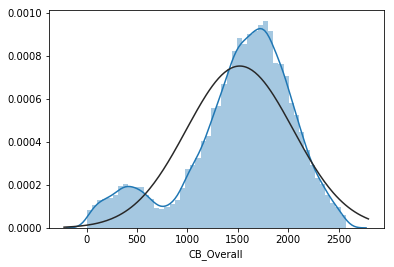

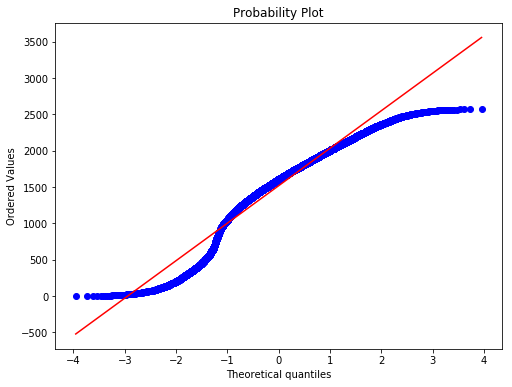

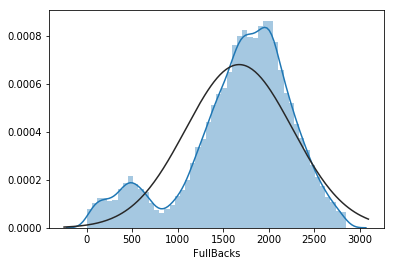

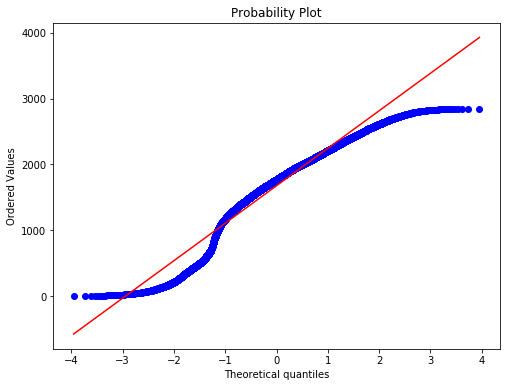

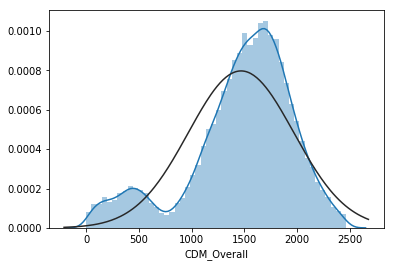

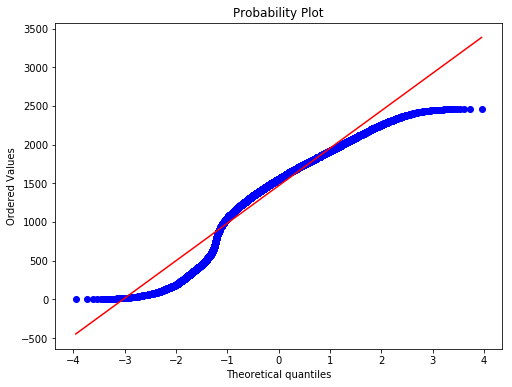

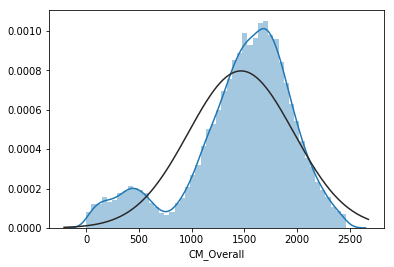

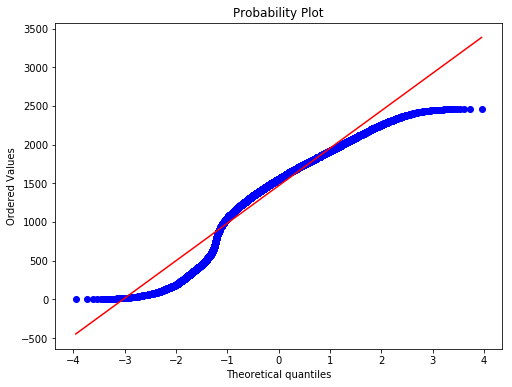

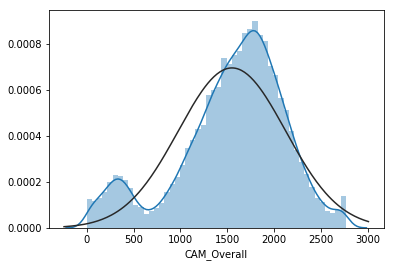

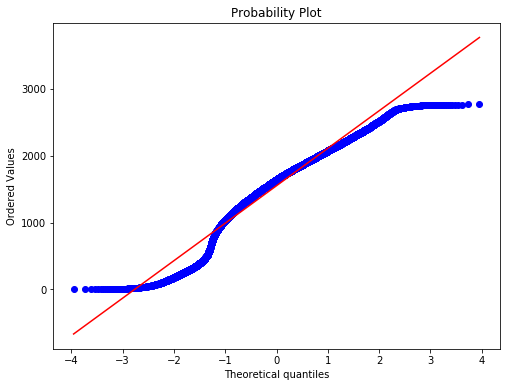

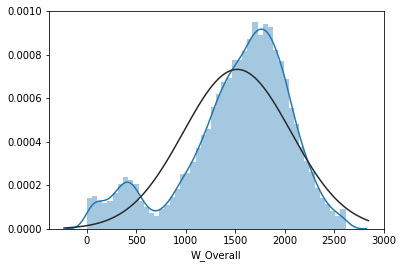

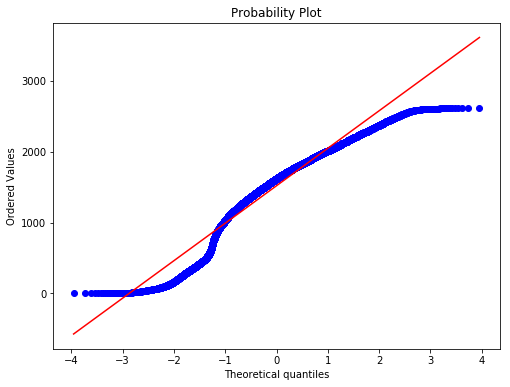

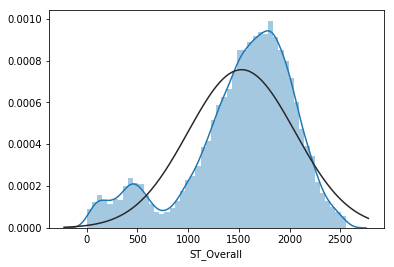

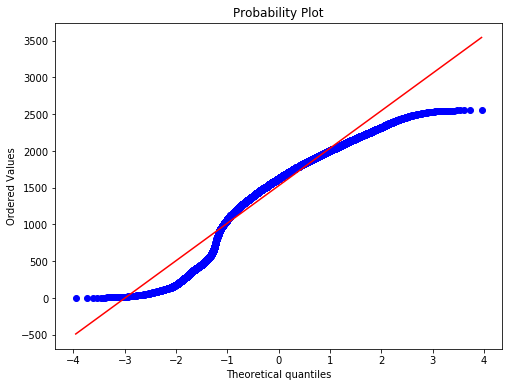

In [77]:
# For plotting data distribution of various variables. It might take a minute or 2
for i in data.columns:
    plot(i)

In [78]:
#Choosing specific columns from the data frame to make regression plots
abilities=['Reactions','ShotPower','Jumping','SprintSpeed',
'Stamina','Agility','Strength','Vision']
import random

def regplot_one_vs_many( x  , y  , data , rows , cols):
    n = 0
    for feature in x:
        print(feature)
        n+=1 
        plt.figure(1,figsize=(16,12))
        plt.subplot(rows , cols , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(feature , y = y , data = data)
        
        plt.show()

Reactions


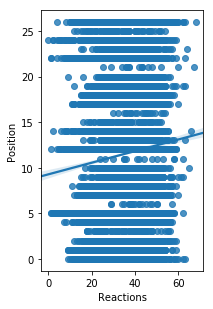

ShotPower


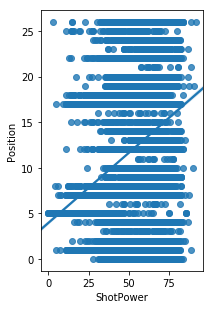

Jumping


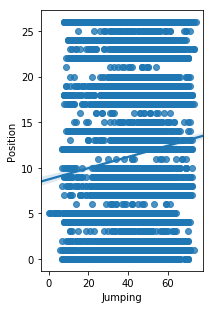

SprintSpeed


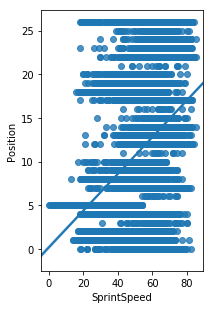

Stamina


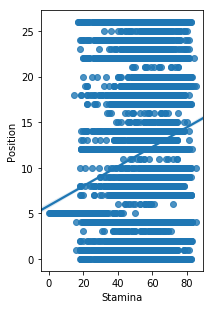

Agility


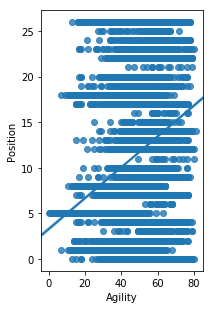

Strength


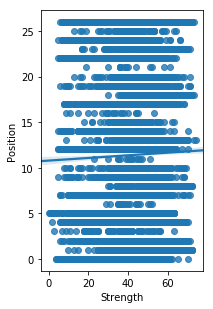

Vision


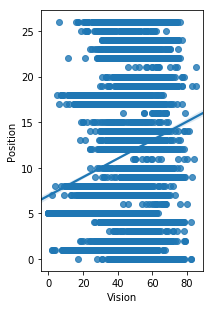

In [79]:

regplot_one_vs_many(x=abilities, y= data['Position'],data=data,rows=2,cols=4)


In [80]:
Y = data['Position']
data = data.drop(['Position'],axis=1)

In [81]:
# correlated less than .39 are removed
corr = data.corr()

corr[np.abs(corr)<.30] = 0
s = corr.unstack()
so = s.sort_values(kind="quicksort")
# so

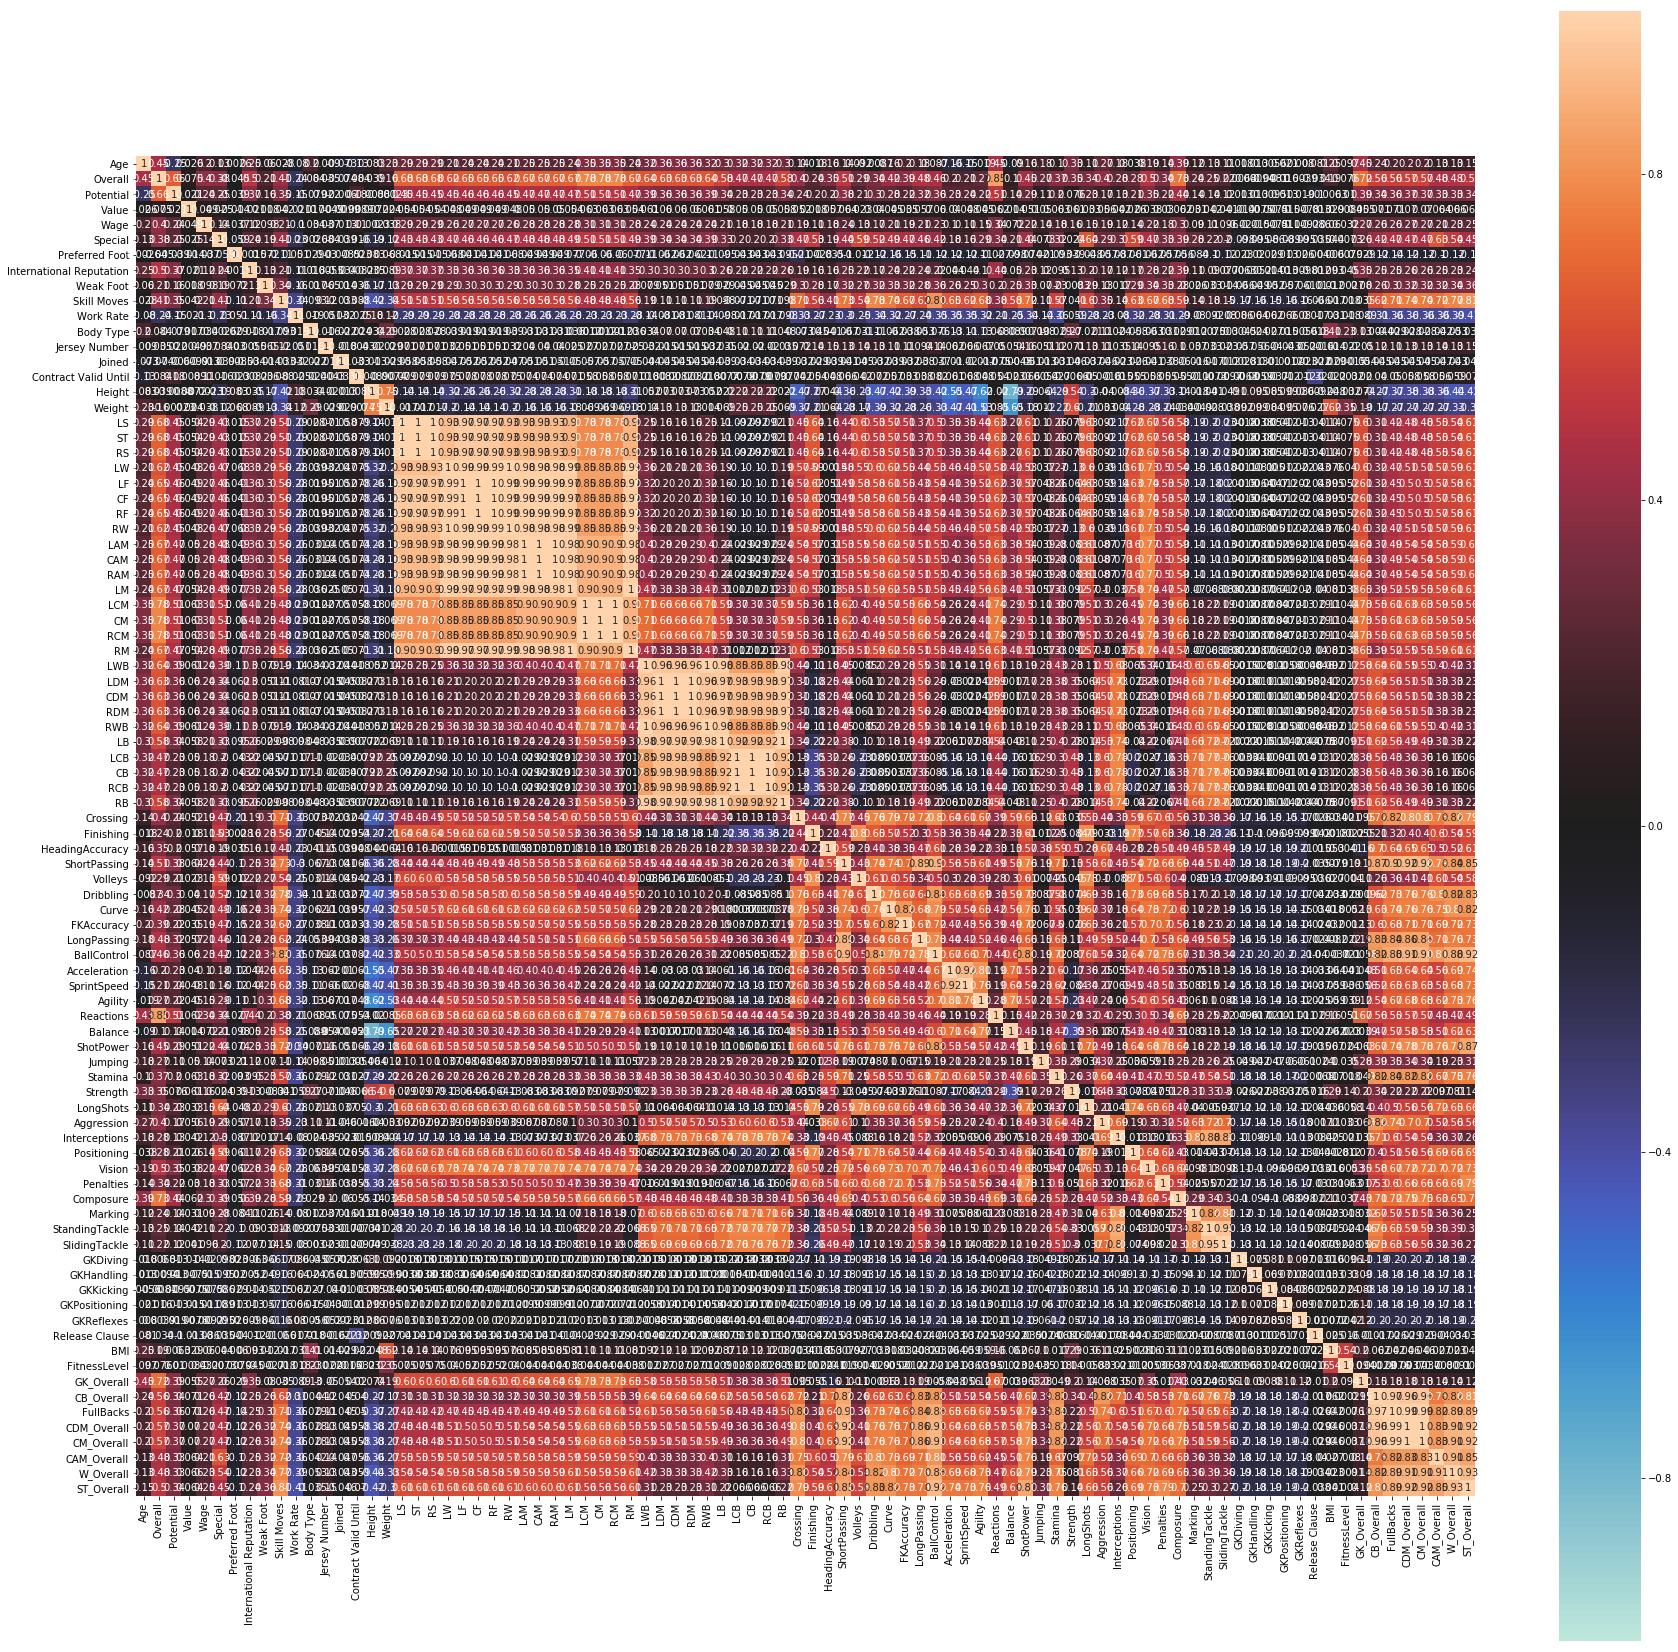

In [82]:
plt.figure(figsize=(30,30))

ff = sns.heatmap(
    data.corr(),annot=True,
    vmin=-1, vmax=1, center=0,
    square=True)

plt.show(ff)

In [83]:
data1 = data

In [84]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) >= threshold and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
                    
correlation(data1, .8)

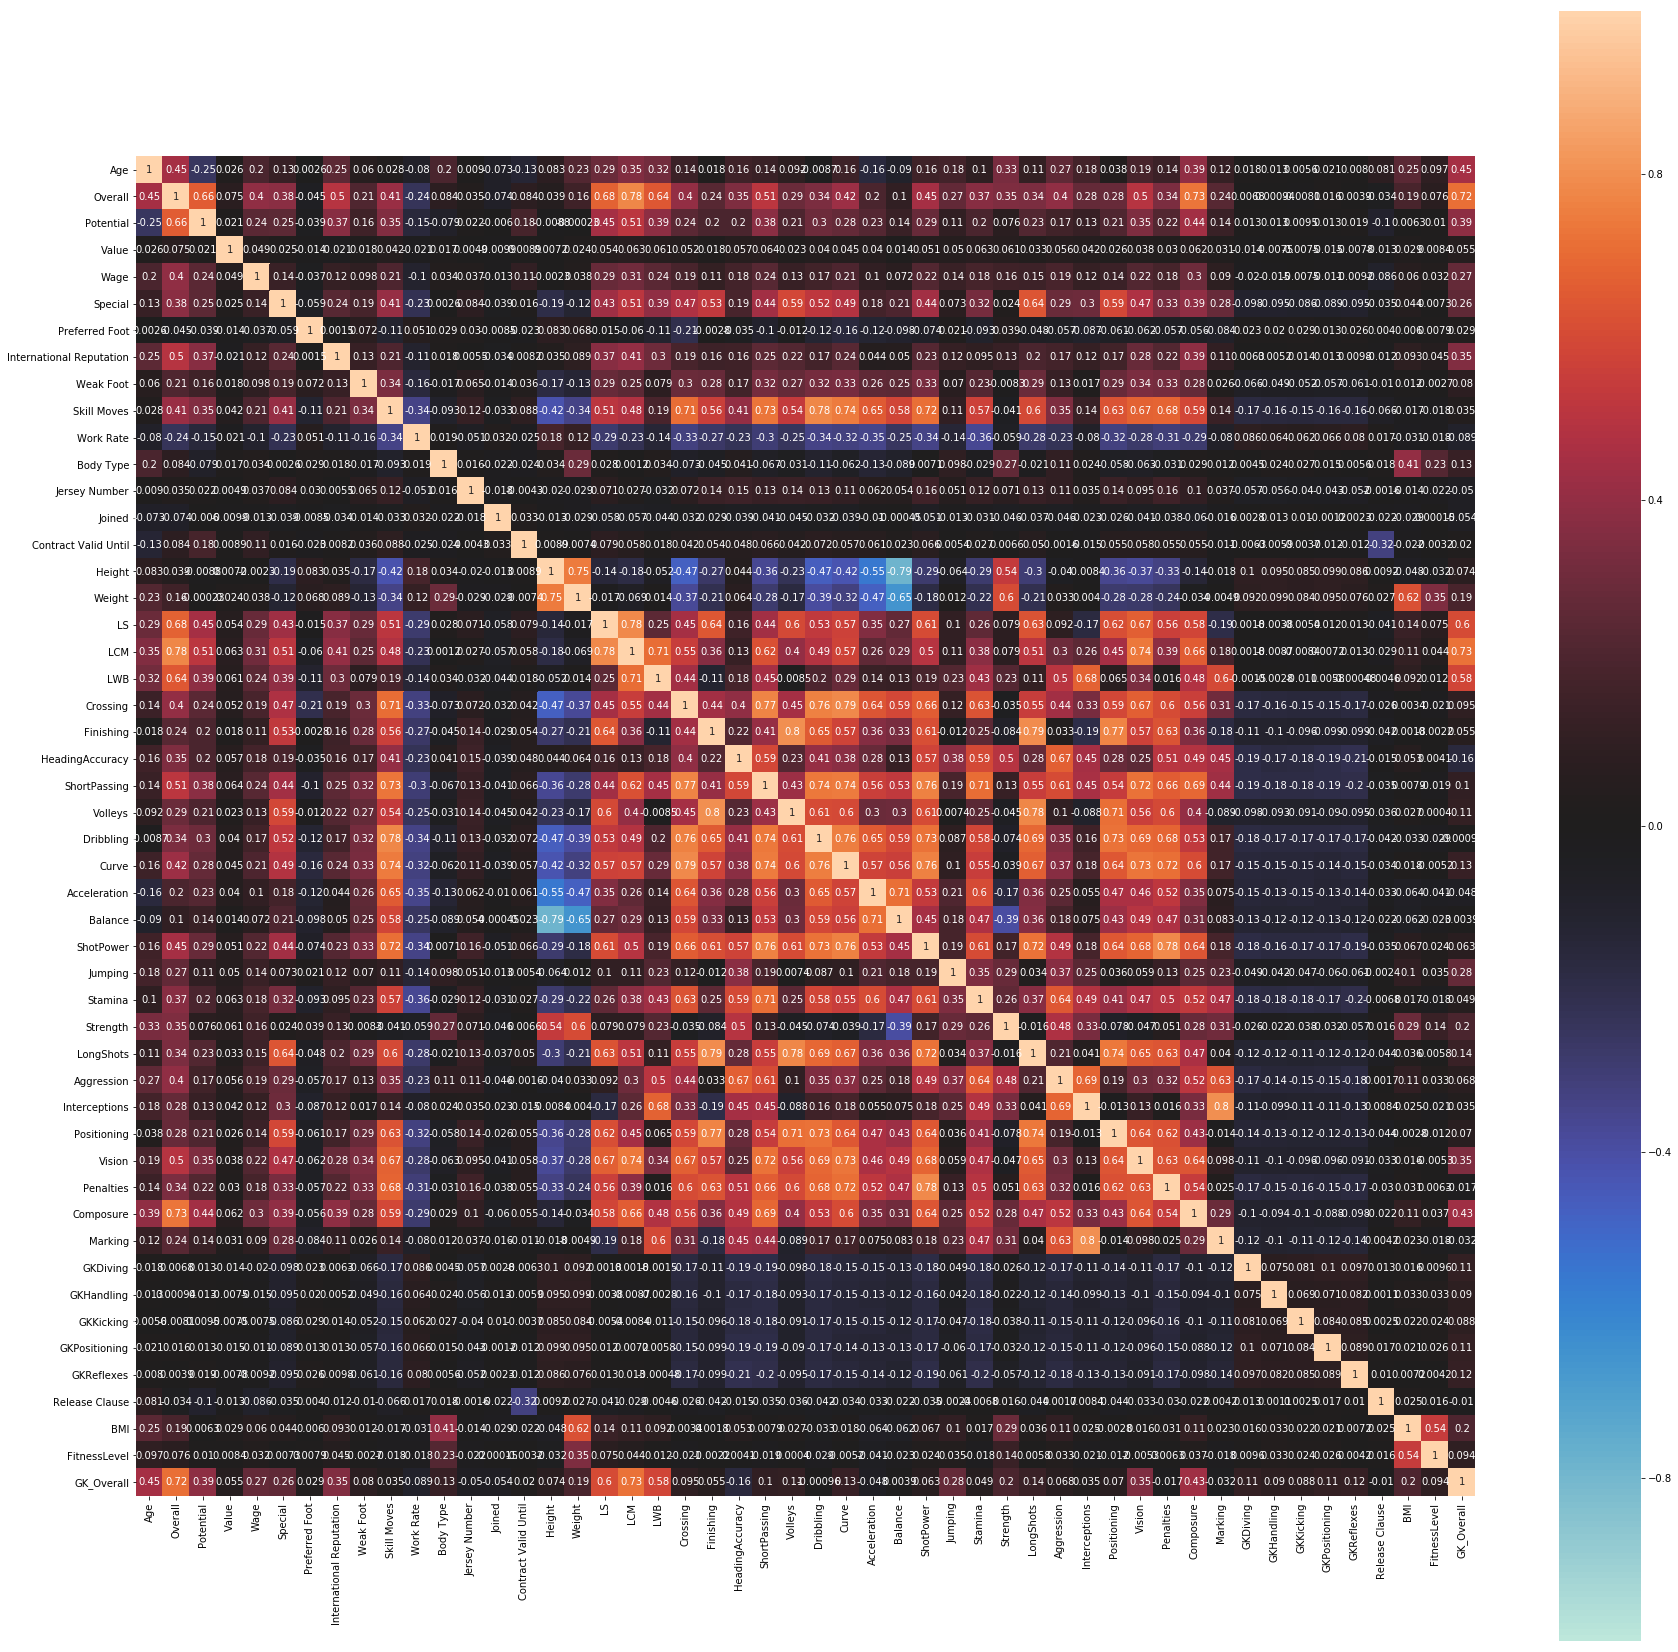

In [85]:
plt.figure(figsize=(30,30))

ff = sns.heatmap(
    data1.corr(), annot=True,
    vmin=-1, vmax=1, center=0,
    square=True)

plt.show(ff)

In [86]:
# Normalization
normalized_data=(data-data.min())/(data.max()-data.min())
normalized_data1=(data1-data1.min())/(data1.max()-data1.min())

In [87]:
normalized_data1.shape

(18207, 50)

In [88]:
# X_train, X_valid, y_train, y_valid = train_test_split(normalized_data1, Y, test_size=0.2, random_state=42)
# X_train, X_valid, y_train, y_valid = KFold(n_splits=2, random_state=None, shuffle=False)


# CHECK THIS ............................................................CHECK THIS............. 


kf = KFold(n_splits=70, random_state=None, shuffle=False)

for train_index, test_index in kf.split(normalized_data1):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_valid = normalized_data1.iloc[train_index], normalized_data1.iloc[test_index]
    y_train, y_valid, y_plot = Y.iloc[train_index], Y.iloc[test_index], label[test_index]

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), 
           rmse(m.predict(X_valid), y_valid), m.score(X_train, y_train), 
          m.score(X_valid, y_valid)]
    
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    return(res)



m =  RandomForestClassifier(n_estimators=45, min_samples_leaf=3, 
                          max_features=0.3, n_jobs=-1,oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[2.5326199728973826,
 5.352210183293799,
 0.94773499749261714,
 0.66923076923076918,
 0.55262718003008859]

In [89]:
# rf with untuned hyperparameters

model = RandomForestClassifier()
model.fit(X_train,y_train)
print_score(model)

[1.1315392711669905,
 6.425011224174572,
 0.99013762745862821,
 0.59999999999999998]

In [90]:
# support vector machines
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)
print_score(clf)

[7.854892547739616, 4.94041418382025, 0.55858917925001395, 0.72692307692307689]

In [91]:
# applying KNN
knn = KNeighborsClassifier(n_neighbors = 2, n_jobs = -1)
knn.fit(X_train, y_train)
print_score(knn)

[6.825185823930007,
 9.067269964845242,
 0.68518415334039118,
 0.48461538461538461]

In [92]:
# stocastic gradient descent
sgd = SGDClassifier(shuffle = True , random_state = 101)
sgd.fit(X_train, y_train)
print_score(sgd)

/home/sukrit/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[8.332442514746075,
 6.612633596149349,
 0.50153228951913964,
 0.63846153846153841]

In [93]:
# LDM related to CDM and RDM
# data.drop(['CDM'],1,inplace = True)
# data.drop(['RDM'],1,inplace = True)

In [94]:
# corr = data.corr()

# corr[np.abs(corr)<.30] = 0
# s = corr.unstack()
# so = s.sort_values(kind="quicksort")
# so


In [95]:
# list of highly corelated features
# corrlist=[]
# for i in data.columns:
#     for j in data.columns:
#         if data[i].corr(data[j]) > .75 or data[i].corr(data[j]) < -.75 and i !=j and j not in corrlist:
#             corrlist.append(j)
            

In [96]:
# remove high corelated functions


    

In [97]:

# feat_importances = pd.Series(m.feature_importances_, index = normalized_data1.columns)
# feat_importances.nlargest(59).plot(kind='barh', figsize=(8,8))
# plt.figure(figsize = (30,30))
# plt.show()

In [98]:
# feat_importances = pd.Series(m.feature_importances_, index = normalized_data1.columns)
# feat_importances.nlargest(83).plot(kind='barh', figsize=(8,8))


# keep = feat_importances[feat_importances.values>0.009].index; print('number of reduced features',len(keep))


# df_keep = normalized_data1[keep].copy()


# # df_keep.drop(columns=['Name','Club','Jersey Number'],inplace=True)


# cv = KFold(n_splits=70, shuffle=False)
# for train_index, test_index in cv.split(df_keep):
#     X_train,X_valid,y_train,y_valid = df_keep.iloc[train_index], df_keep.iloc[test_index], Y[train_index], Y[test_index]


# model2 = RandomForestClassifier()
# model2.fit(X_train, y_train)
# print_score(model2)




In [99]:
# feat_importances = pd.Series(m.feature_importances_, index = df_keep.columns)
# feat_importances.nlargest(83).plot(kind='barh', figsize=(8,8))

In [100]:
#Random Forest validation set predictions
predictions = m.predict(X_valid)

In [118]:
a = dict(zip(y_valid,y_plot))

In [119]:
a

{0: 'CAM',
 1: 'CB',
 2: 'CDM',
 3: 'CF',
 4: 'CM',
 5: 'GK',
 7: 'LB',
 9: 'LCM',
 10: 'LDM',
 12: 'LM',
 14: 'LW',
 15: 'LWB',
 17: 'RB',
 22: 'RM',
 23: 'RS',
 24: 'RW',
 25: 'RWB',
 26: 'ST'}

In [128]:
newlabel = [*a.values()]

In [129]:
newlabel

['GK',
 'LB',
 'ST',
 'CM',
 'CAM',
 'CB',
 'RM',
 'RW',
 'LM',
 'CDM',
 'RB',
 'RS',
 'LW',
 'CF',
 'LWB',
 'RWB',
 'LDM',
 'LCM']

In [123]:
y_true=[]
for i in y_valid:
    y_true.append(a[i])

In [151]:
predicted_values = []
for i in predictions:
    predicted_values.append(a[i])

In [157]:
data_tuples = list(zip(y_true,predicted_values))

In [160]:
y_act_vs_y_pred = pd.DataFrame(data_tuples, columns=['True Value','Predicted Value'])

In [161]:
y_act_vs_y_pred.to_excel(r'/home/sukrit/Desktop/Random_Forest_Predictions.xlsx')

In [145]:
locs = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]

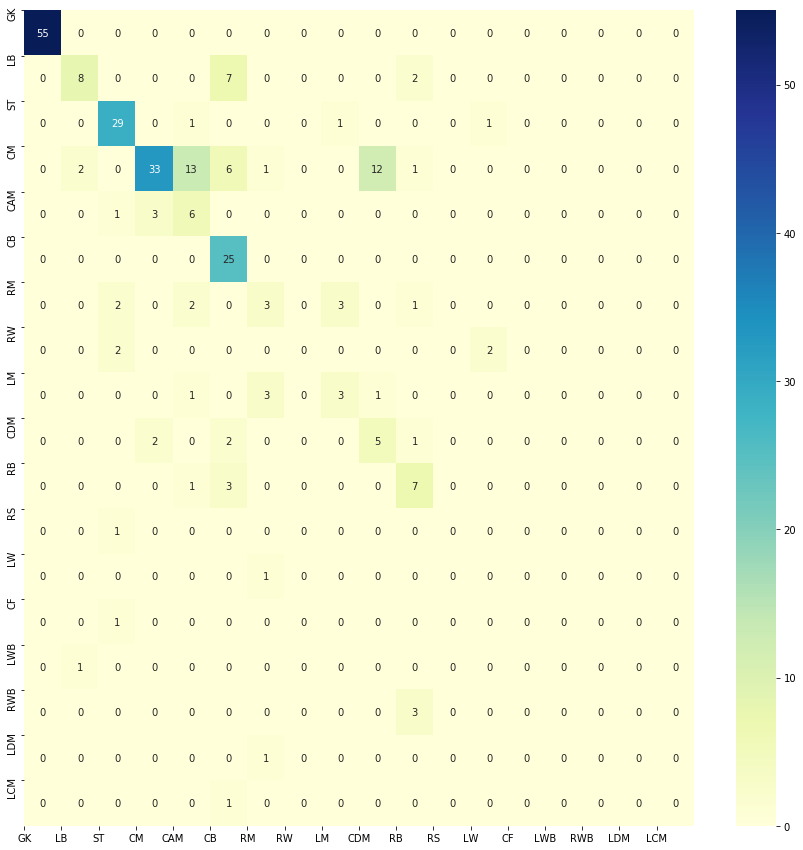

In [146]:
#Random Forest confusion matrix
conf_mat = confusion_matrix(y_true, predicted_values, newlabel)
plt.figure(figsize=(15,15))
sns.heatmap(conf_mat,annot = True, cmap='YlGnBu')
plt.xticks(locs,newlabel)
plt.yticks(locs,newlabel)
plt.show()

In [162]:
#Support Vector Machine validation set predictions
predictions = clf.predict(X_valid)

In [163]:
predicted_values = []
for i in predictions:
    predicted_values.append(a[i])

In [167]:
data_tuples = list(zip(y_true,predicted_values))

In [165]:
y_actu_vs_y_pred = pd.DataFrame(data_tuples, columns=['True Value','Predicted Value'])

In [166]:
y_actu_vs_y_pred.to_excel(r'/home/sukrit/Desktop/SVM_Predictions.xlsx')

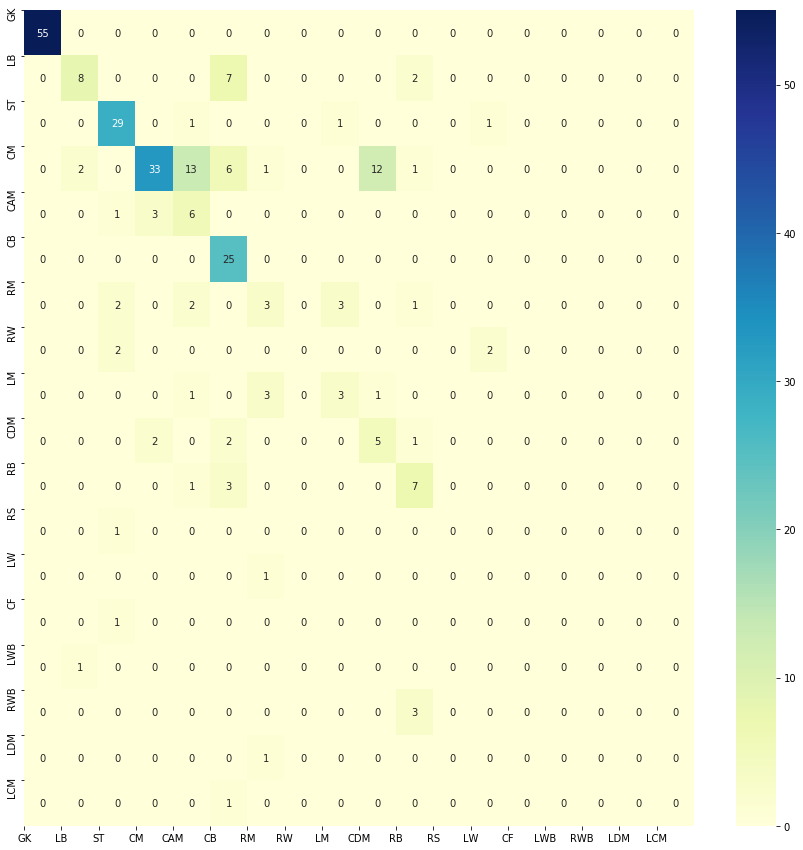

In [168]:
#Support Vector Machine confusion matrix
conf_mat = confusion_matrix(y_true, true_predictions, labels=newlabel )
plt.figure(figsize=(15,15))
sns.heatmap(conf_mat,annot = True, cmap='YlGnBu')
plt.xticks(locs,newlabel)
plt.yticks(locs, newlabel)
plt.show()

In [149]:
normalized_data1.to_excel(r'/home/sukrit/Desktop/Relevant_Fields.xlsx')